# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 1. Cвойства и сравнение оценок
### Мягкий дедлайн --- 6 октября 23:59
### Жёсткий дедлайн --- 12 октября 16:59

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о способе сдачи домашнего задания будет позже.

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [168]:
# Matplotlib needed to correctly display suptitles,
# as well as some other minor things.
# I thought I might as well ensure everything is up to date
%pip install --upgrade matplotlib numpy scipy statsmodels

  Using cached numpy-2.1.2-cp310-cp310-win_amd64.whl.metadata (59 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [169]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

**Зафиксируем** `seed` для воспроизводимости.

In [171]:
np.random.seed(42)

**Условие задания**: Аспект-Император трёх морей Анасуримбор Келлхус спустя 20 лет с момента объединения Новой Империи объявляет начало Великой Ордалии --- похода против крепости Голготтерат. Поход займёт более, чем пол года путешествия сквозь безжизненные населённые дикими монстрами пустоши, в связи с чем Келлхус отдаёт приказ всем провинциям выдать провизию для похода, а имперским математикам, коим принадлежите Вы --- сосчитать, каждый ли правитель провинции выполнил приказ качественно.

В этой практике Вам придётся оценить число материальных ресурсов, предоставленных каждой из тысячи провинций, лучшим образом и предоставить отчёт, чему равно мат. ожидание числа ресурсов и почему Ваш способ оценивания хорош. Будем надеяться, что в среднем все короли добросовестно выполнили приказ.

**Гайд, как моделировать оценки**:

В разных задачах Вы будете видеть ключевое слово "смоделируйте". Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить гистограмму или эмпирическую функцию распределения, и сделать выводы о распределении оценок.

Как мы знаем по теореме Гливенко-Кантелли, эмпирическая функция распределения сходится к реальной, и, при некоторых условиях, гистограмма сходится к плотности, если она существует.

### Задача 1

Известно, что количество урожая каждой Нансурской провинции в год подчиняется распределению $U[0, 2]$ в тоннах. Некоторые короли решают оставить существенную часть урожая, мимикрируя под $U[0, \theta]$ для $\theta < 2$. Нужно предложить метод оценки $\theta$. Если значение оценки будет меньше 2, приказ будет считаться невыполненным.

Ставится задача изучить способы оценивания параметра $\theta$ семейства распределений $U[0, \theta]$. В данной задаче Вы численно смоделируете оценки параметра $\theta$ и сделаете вывод о том, какую оценку стоит применить на практике.

Сгенерируйте $N$ выборок $X_1, \dots, X_N$ размера $N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$ и $\theta = 2$.

In [ ]:
N = 1e4  # use this
N = int(N)
# your code here
theta = 2

samples = sps.uniform.rvs(0, theta, size=(N,N))

Для всех $N$ выборок посчитайте оценки параметра $\theta$: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

In [173]:
means = np.mean(samples, axis=1)
X_min = np.min(samples, axis=1)
X_max = np.max(samples, axis=1)

theta_1 = 2 * means
theta_2 = means + X_max / 2
theta_3 = (N + 1) * X_min
theta_4 = X_min + X_max
theta_5 = (N + 1) / N * X_max



При помощи моделирования выясните, какие оценки точнее, чем другие.

Для этого прикиньте распределение каждой из оценок. Какая оценка предпочтительнее? Почему?

<Figure size 1200x800 with 0 Axes>

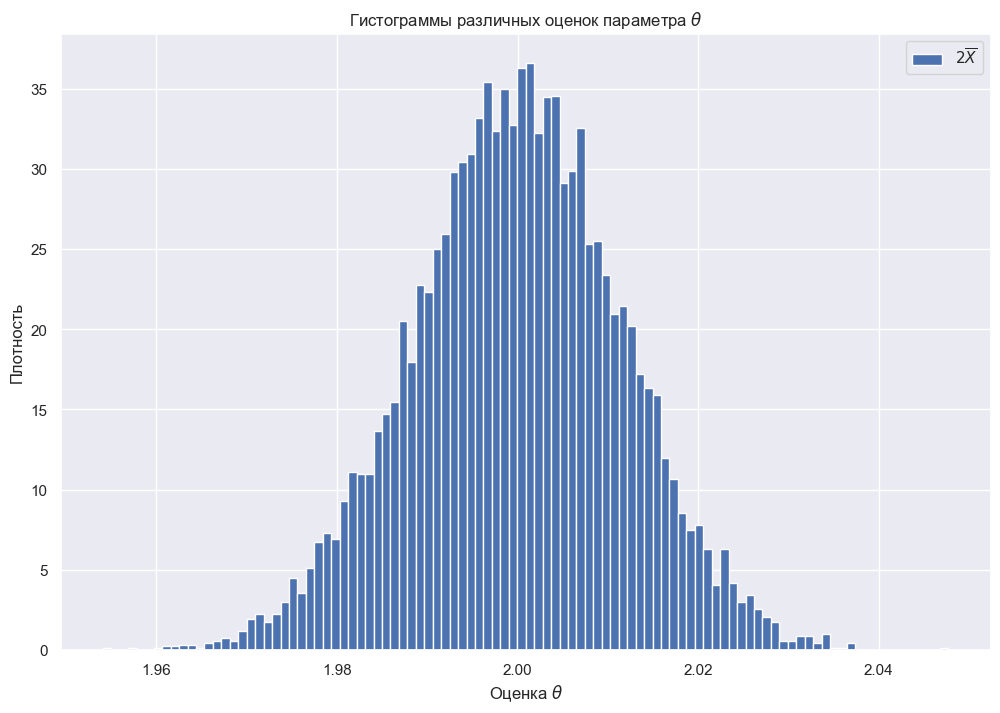

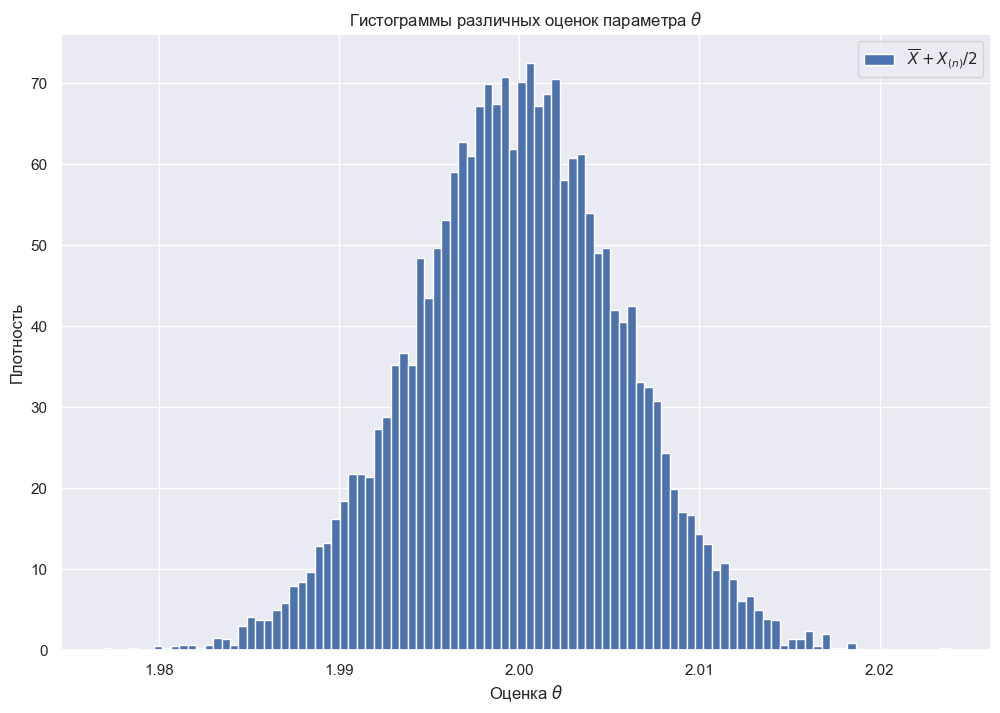

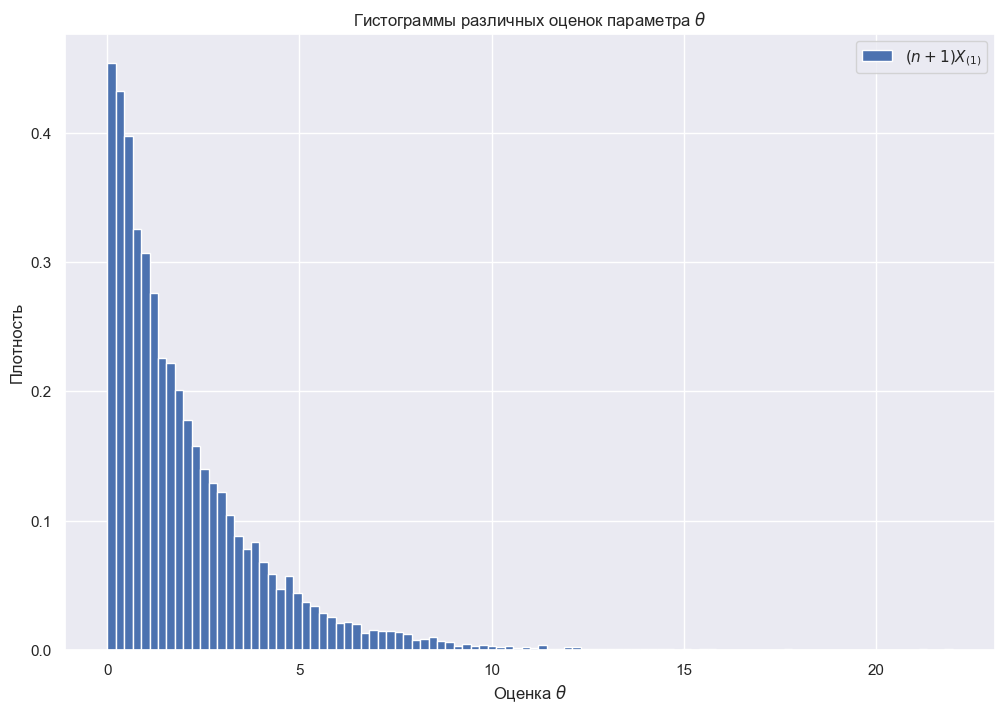

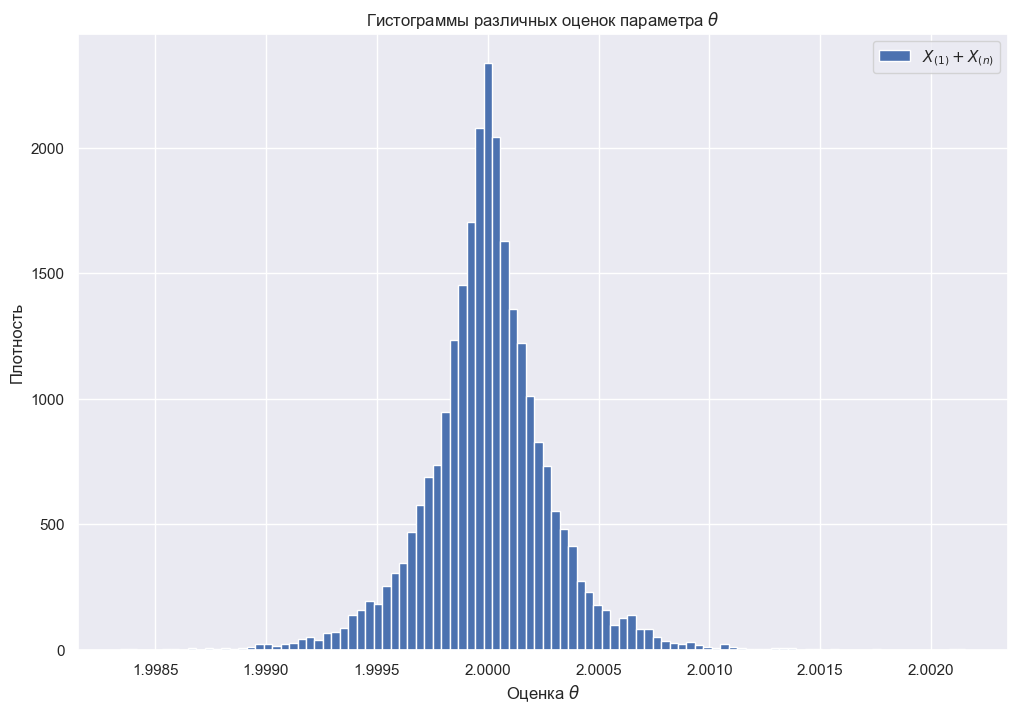

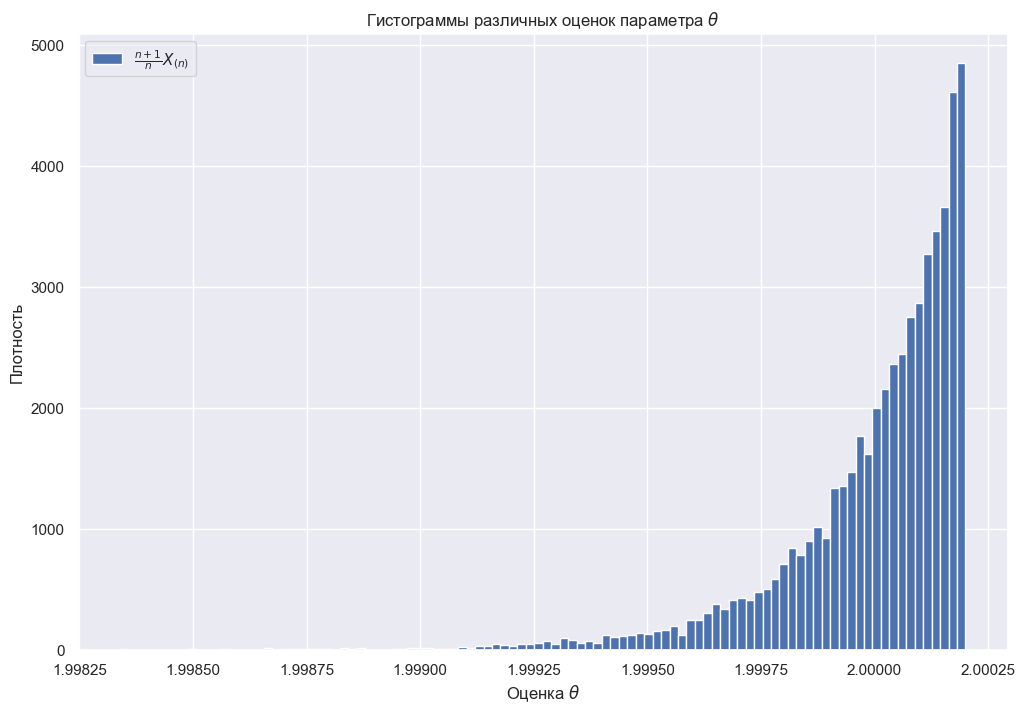

In [174]:
plt.figure(figsize=(12, 8))
bins = 100

thetas = [theta_1, theta_2, theta_3, theta_4, theta_5]

labels = [r'$2\overline{X}$', r'$\overline{X} + X_{(n)}/2$', r'$(n+1)X_{(1)}$', r'$X_{(1)} + X_{(n)}$', r'$\frac{n+1}{n} X_{(n)}$']
for theta, label in zip(thetas, labels):
    plt.figure(figsize=(12, 8))
    plt.hist(theta, bins=bins, alpha=1, label=label, density=True)
    plt.legend()
    plt.title('Гистограммы различных оценок параметра $\\theta$')
    plt.xlabel('Оценка $\\theta$')
    plt.ylabel('Плотность')
    plt.show()

Как меняется распределение каждой оценки с ростом параметра? Постройте оценки не только по выборкам, но и по их префиксам. В качестве размера префикса возьмите хотя бы 4 значения, меньших N.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

Изучите оценки на состоятельность и нормальность. Сравните скорости сходимости.

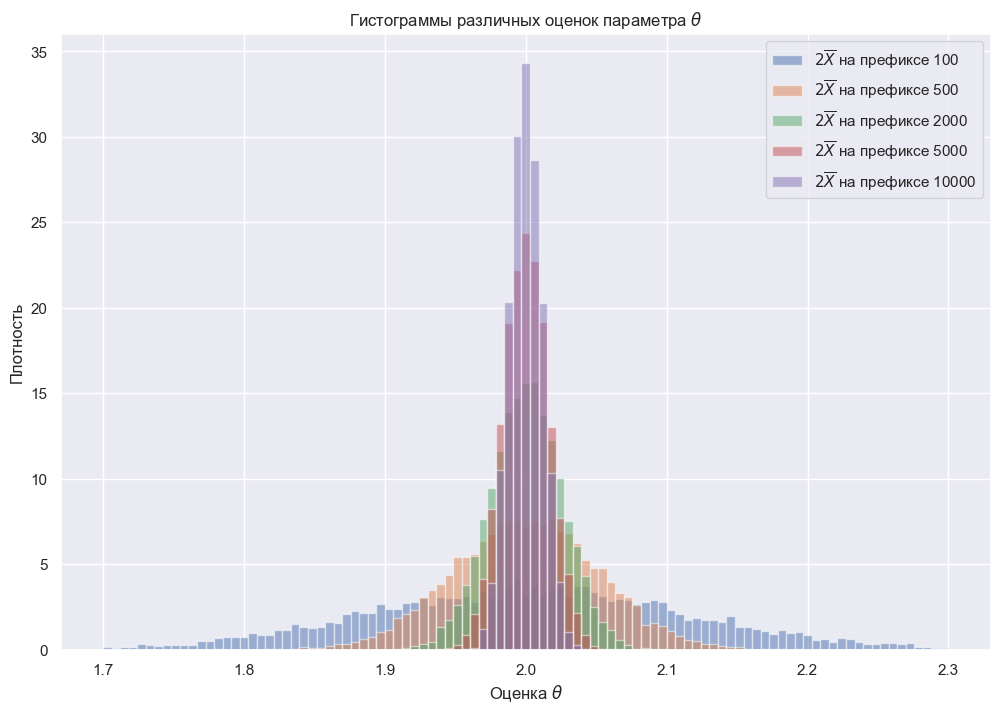

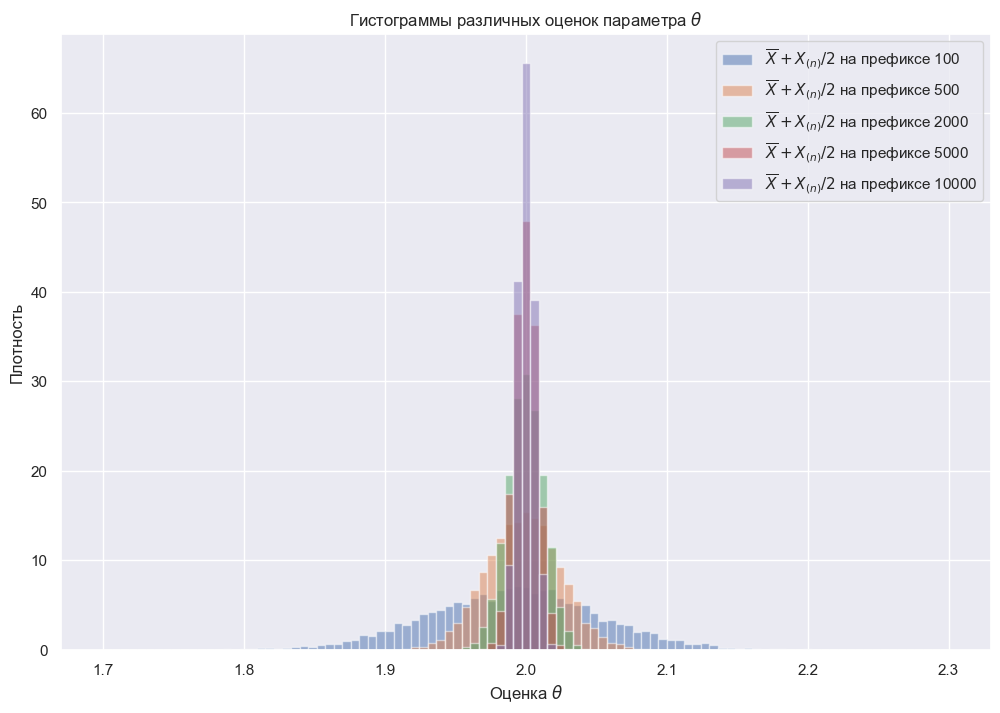

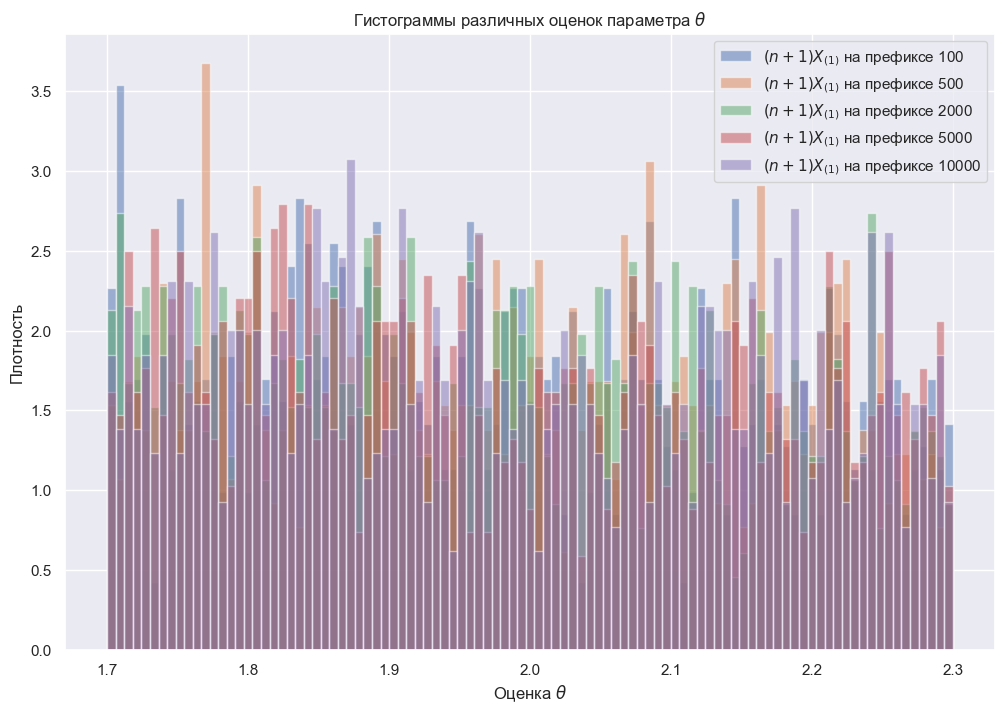

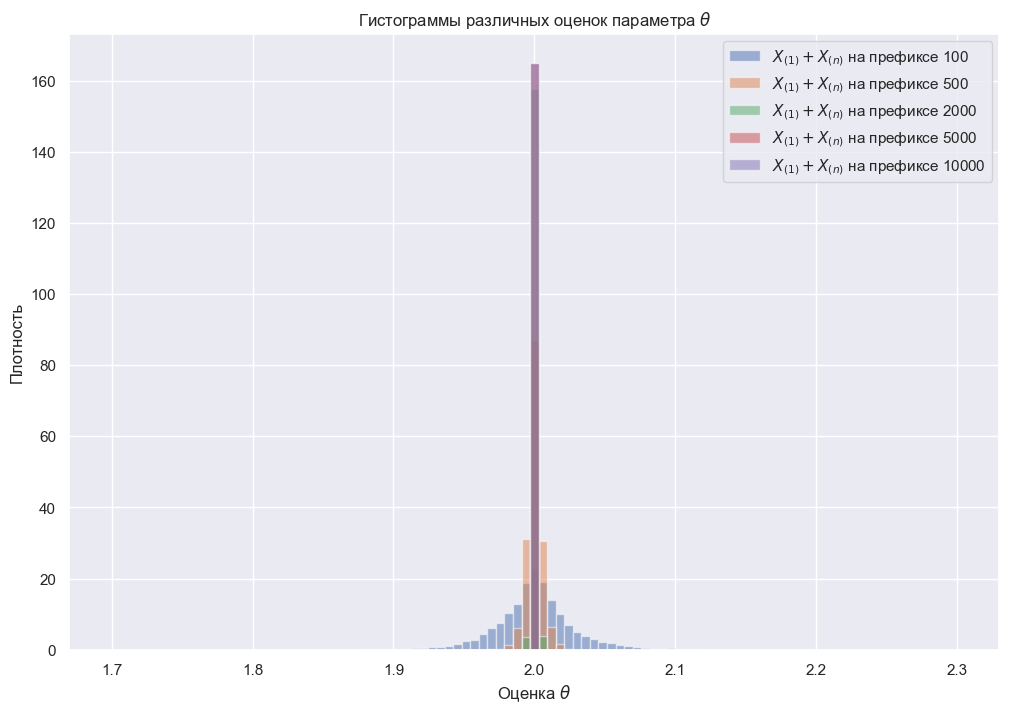

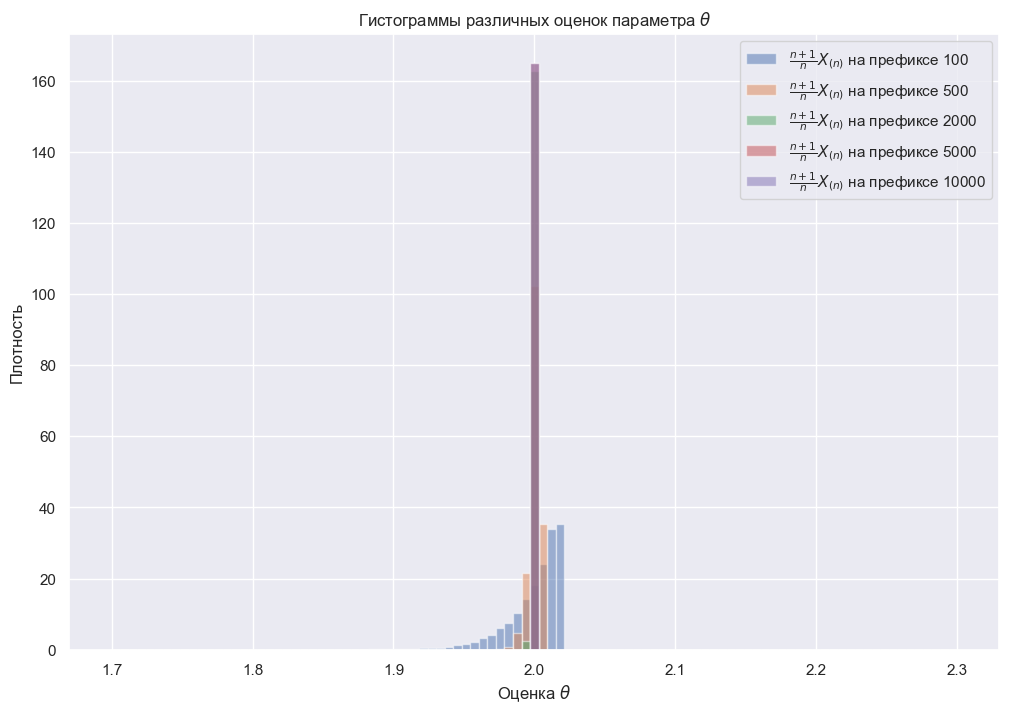

In [175]:
N = 1e4  # use this
N = int(N)
# your code here
theta = 2


prefix_sizes = np.array([100, 500, 2000, 5000, N])

means = np.cumsum(samples, axis=0) / (np.arange(1, N + 1).reshape(-1, 1))
X_min_acc = np.minimum.accumulate(samples, axis=0)
X_max_acc = np.maximum.accumulate(samples, axis=0)

theta_1_prefix = 2 * means
theta_2_prefix = means + X_max_acc / 2
theta_3_prefix = (np.arange(1, N + 1).reshape(-1, 1) + 1) * X_min_acc
theta_4_prefix = X_min_acc + X_max_acc
theta_5_prefix = (np.arange(1, N + 1).reshape(-1, 1) + 1) / np.arange(1, N + 1).reshape(-1, 1) * X_max_acc

theta_prefixes = [theta_1_prefix, theta_2_prefix, theta_3_prefix, theta_4_prefix, theta_5_prefix]
bins = np.linspace(1.7, 2.3, 100)
for theta_pref, label in zip(theta_prefixes, labels):
    plt.figure(figsize=(12, 8))
    for prefix_size in prefix_sizes:
        plt.hist(theta_pref[prefix_size - 1], bins=bins, alpha=0.5, label=label + ' на префиксе {}'.format(prefix_size), density=True)
    plt.legend()
    plt.title('Гистограммы различных оценок параметра $\\theta$')
    plt.xlabel('Оценка $\\theta$')
    plt.ylabel('Плотность')
    plt.show()

Для проверки на состоятельность проверим, что оценки сходятся к значение параметра с ростом n для всех выборок. Будем делать на выборках оценок размером 1000.

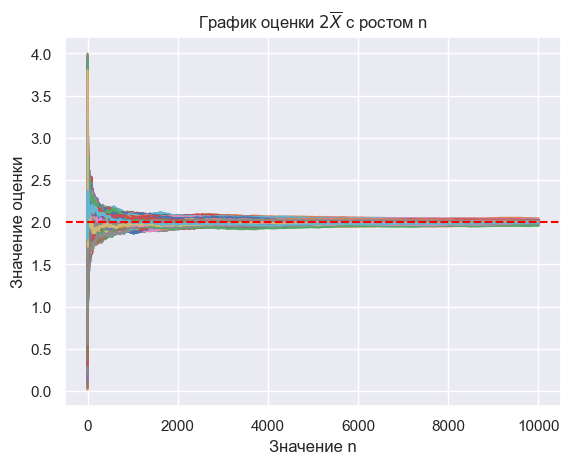

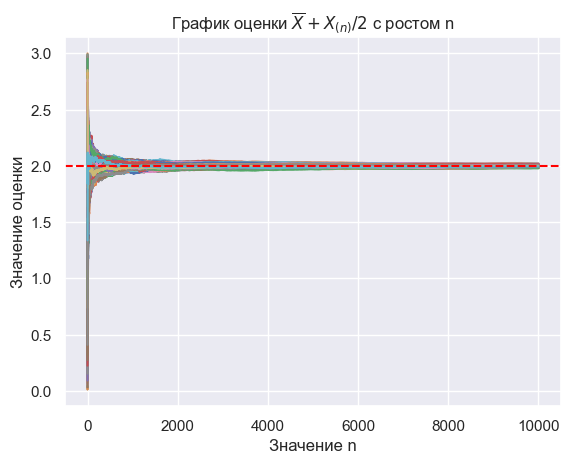

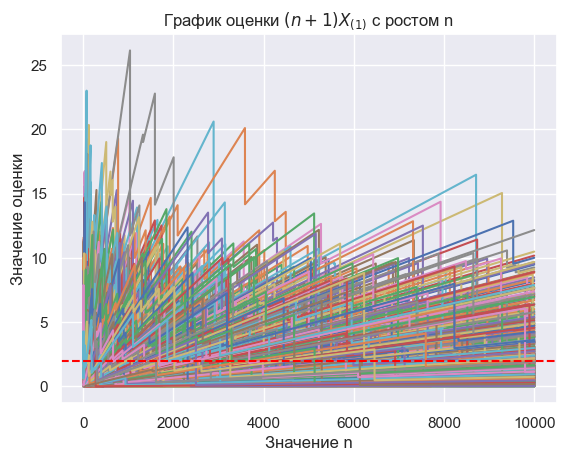

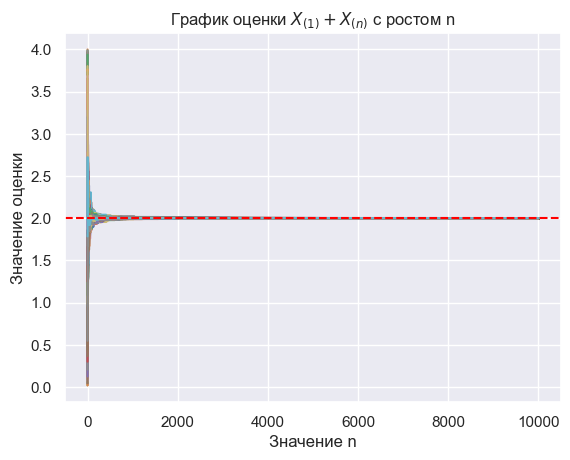

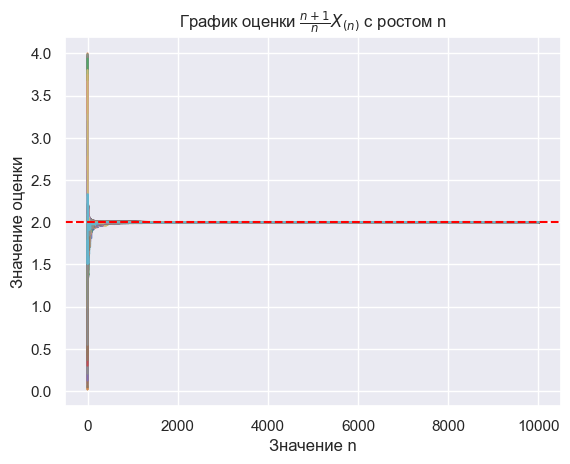

In [176]:
n = 1000
for theta_pref, label in zip(theta_prefixes, labels):
    for i in np.arange(n):
        plt.plot(np.arange(1, N+1), np.transpose(theta_pref)[i])
    plt.axhline(y=theta, color='red', linestyle='--', label='y = 0.5')
    plt.title("График оценки " + label +" с ростом n")
    plt.xlabel("Значение n")
    plt.ylabel("Значение оценки")
    plt.show()

По полученным графикам видно, что все оценки кроме 3 состоятельные, так как они сходятся к значению параметра с ростом n.

Для проверки на ассимптотическую нормальность нужно проверить, что плотность $\sqrt{n}(\theta^*-\theta)$ сходится к нормальному. Для этого на префиксах построим соответствующие гистограммы.

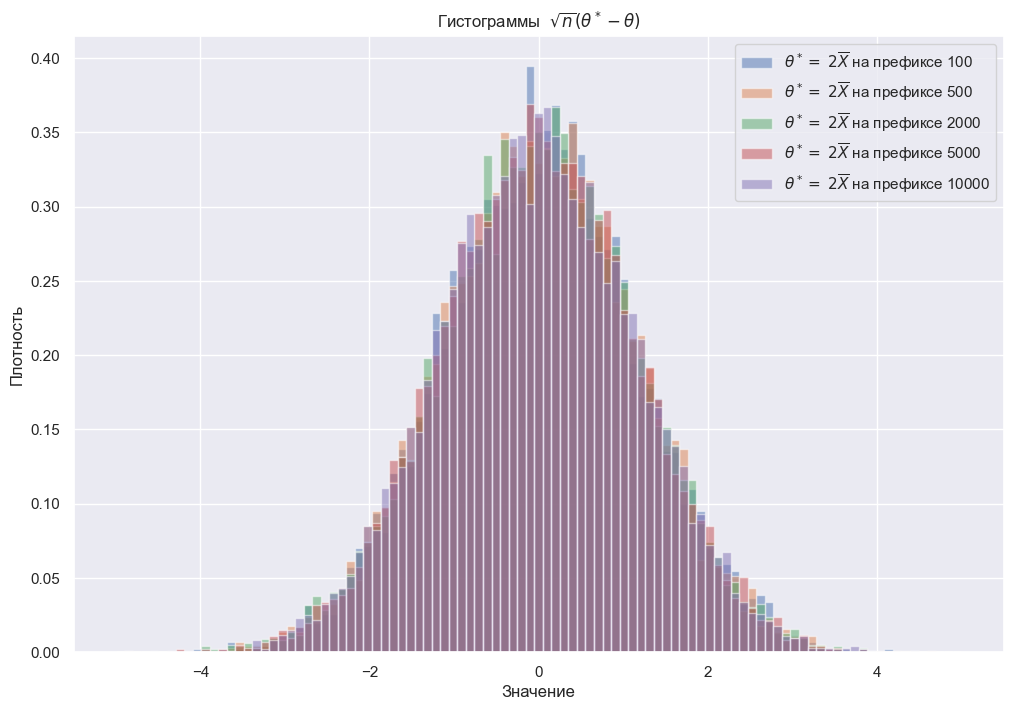

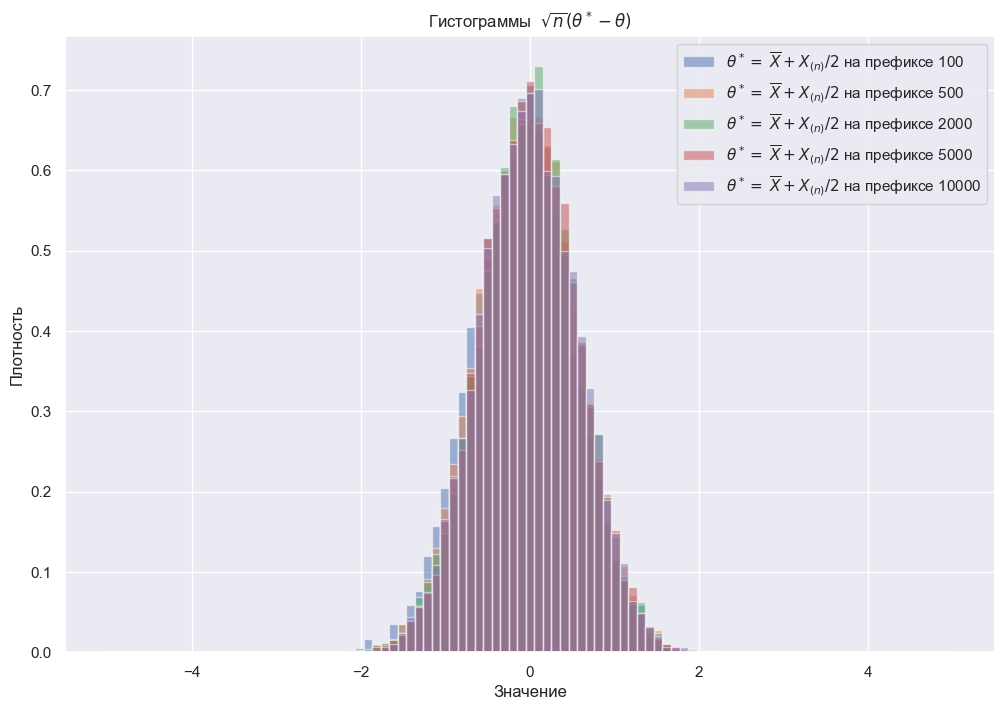

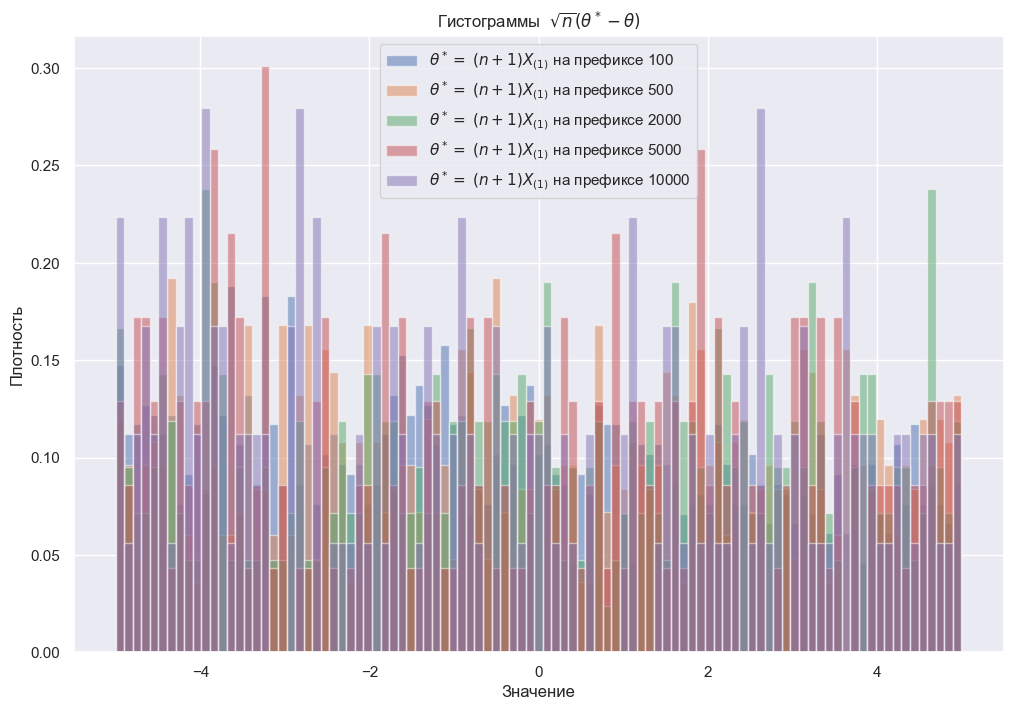

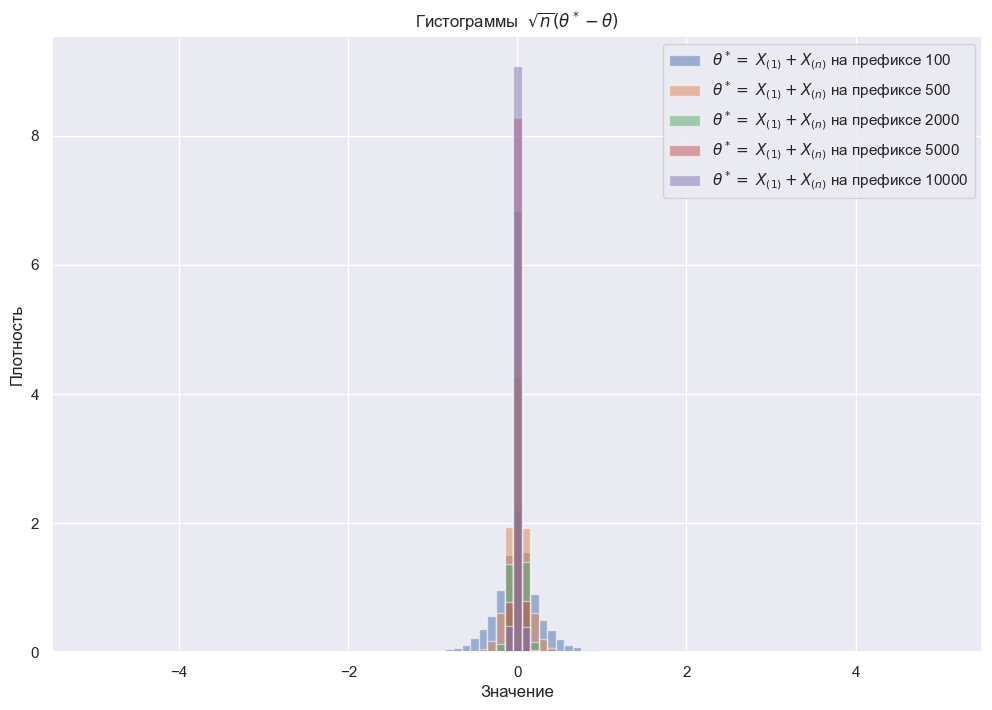

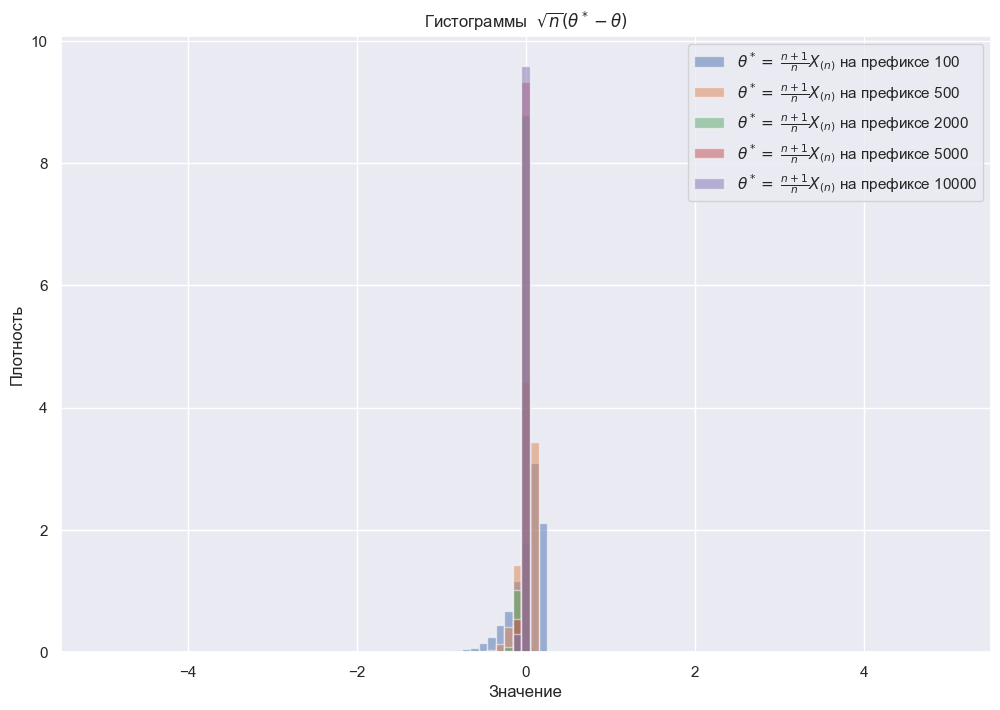

In [177]:
bins = np.linspace(-5, 5, 100)
for theta_pref, label in zip(theta_prefixes, labels):
    plt.figure(figsize=(12, 8))
    for prefix_size in prefix_sizes:
        plt.hist(np.sqrt(prefix_size) * (theta_pref[prefix_size - 1] - theta), bins=bins, alpha=0.5, label=r'$\theta^*=$ ' +label + ' на префиксе {}'.format(prefix_size), density=True)
    plt.legend()
    plt.title(r'Гистограммы  $\sqrt{n}(\theta^*-\theta)$')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.show()

По графикам видно, что все кроме 3 и 5 оценки ассимптотически нормальные.

Полученные нами результаты действительно сходятся с теоретическими результатами, полученными при решении соответствующей задачи на семинаре.

Какая оценка получилась лучше? Как Вы это поняли? А что говорит теория? Стоит ли в данной ситуации сравнивать оценки для других значений параметра $\theta$?

__Ответ:__ Самая лучшая оценка получилась 4, так как у нее выполняются все хорошие свойства оценок и видно по графику ее сходимости к $\theta$, что она сходится быстрее всего. Сравнивать оценки для других параметров $\theta$ могло бы иметь смысл для определения лучшей оценки, так как в определении лучшей оценки мы должны сравнить их для всех $\theta$.


Сделайте вывод.


__Вывод:__ При решении задачи мы поняли, что оценки, имеющие все хорошие свойства оценок действительно по графикам лучше оценивают параметр.Также на примере 3 оценки мы поняли, что недостаточно несмещенности оценки для того, чтобы она хорошо оценивала параметр.

### Задача 2

Конрийские провинции известны своими пастбищами и скотоводами. Принц Нерсей Пройас замерил, что количество скота подчиняется экспоненциальному распределению с параметром $\lambda = 1$ (в тысячах голов). Для подсчёта оценки параметра есть семейство оценок $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$, каждая следующая из которых требует большего числа операций на вычисление. Стоит ли оно того? Это и нужно выяснить.

В этой задаче Вы научитесь подбирать гиперпараметр к семейству оценок. Как известно из основного курса статистики, для любого $k$ оценка  $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ является состоятельной и асимптотически нормальной. Но какой $k$ стоит выбрать?

Сгенерируйте $N$ выборок $X_1, ..., X_N$ размера $n$ из экспоненциального распределения с параметром $\lambda = 1$ для $N = n = 10^4$.

In [178]:
N = 10000  # Количество выборок
n = 10000  # Размер каждой выборки
lambda_param = 1  # Параметр экспоненциального распределения

samples = sps.expon.rvs(scale = 1/lambda_param, size=(N, n))

Для всех выборок посчитайте оценку $\widehat{\lambda}_k=(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\lambda$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

In [179]:
import math

In [180]:
k_array = np.arange(1, 11)
estim_arr = []

for k in k_array:
    estim_arr.append(np.power(math.factorial(k)/(np.mean(np.power(samples,k), axis=1)), 1/k))


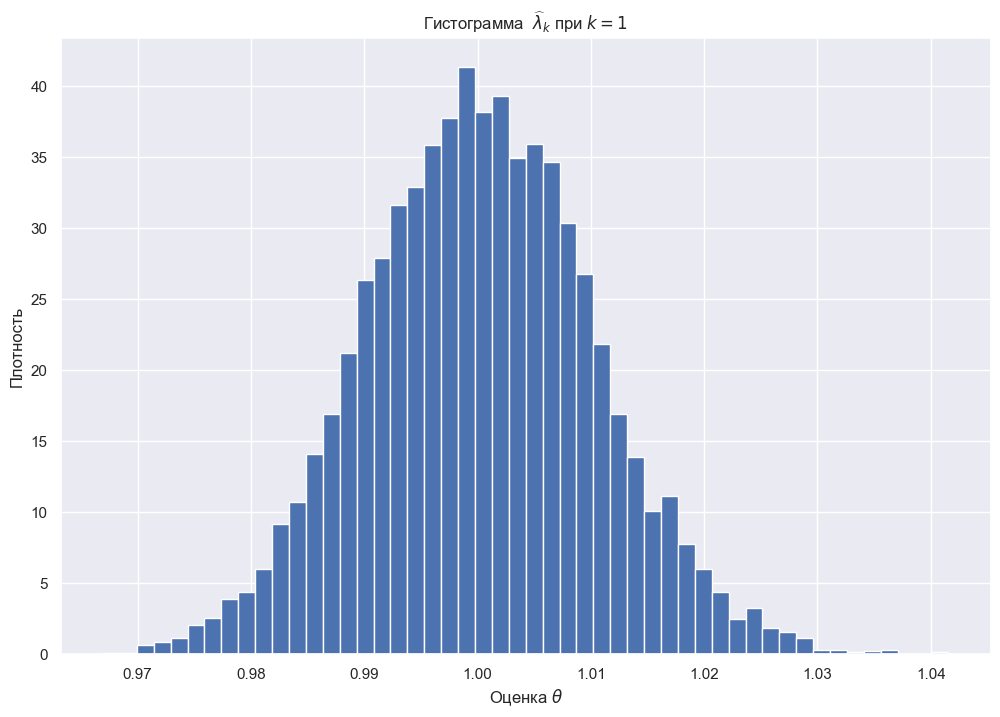

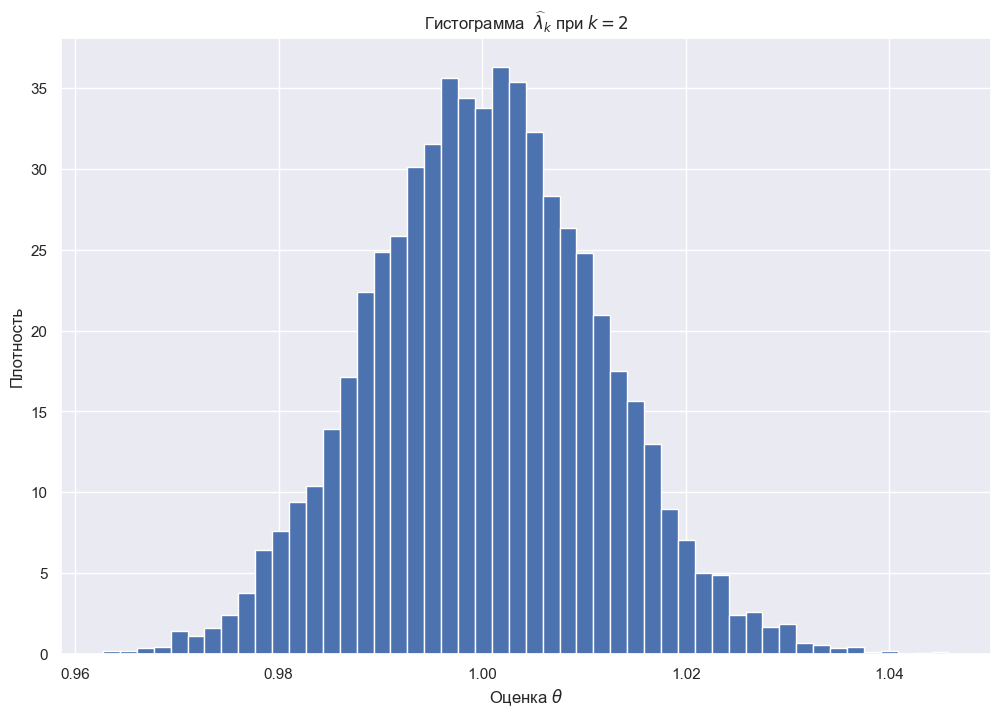

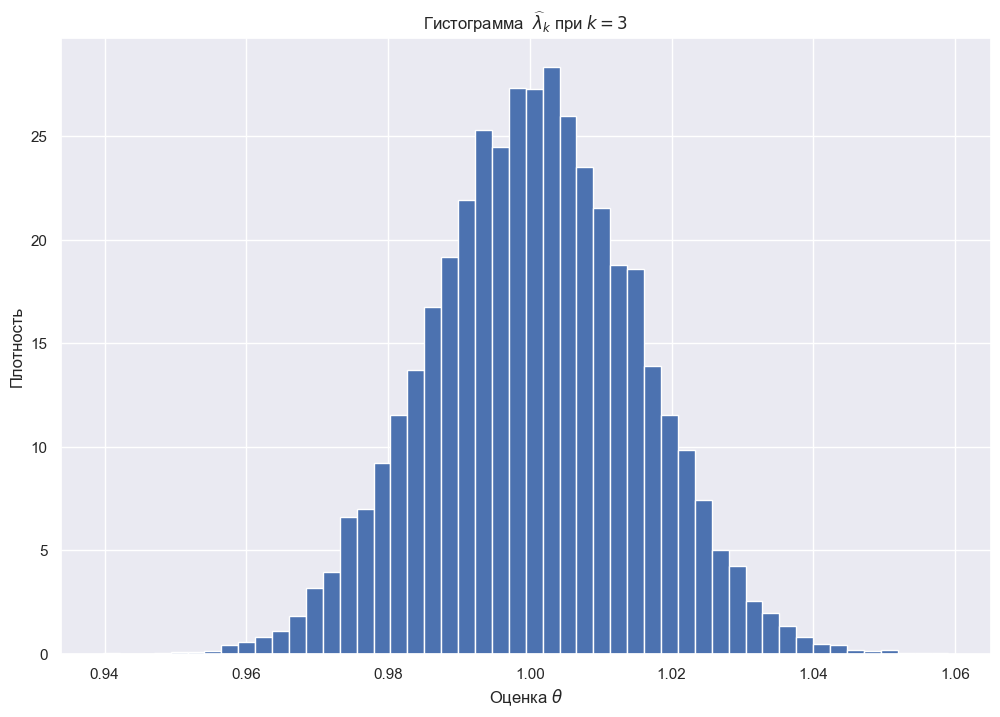

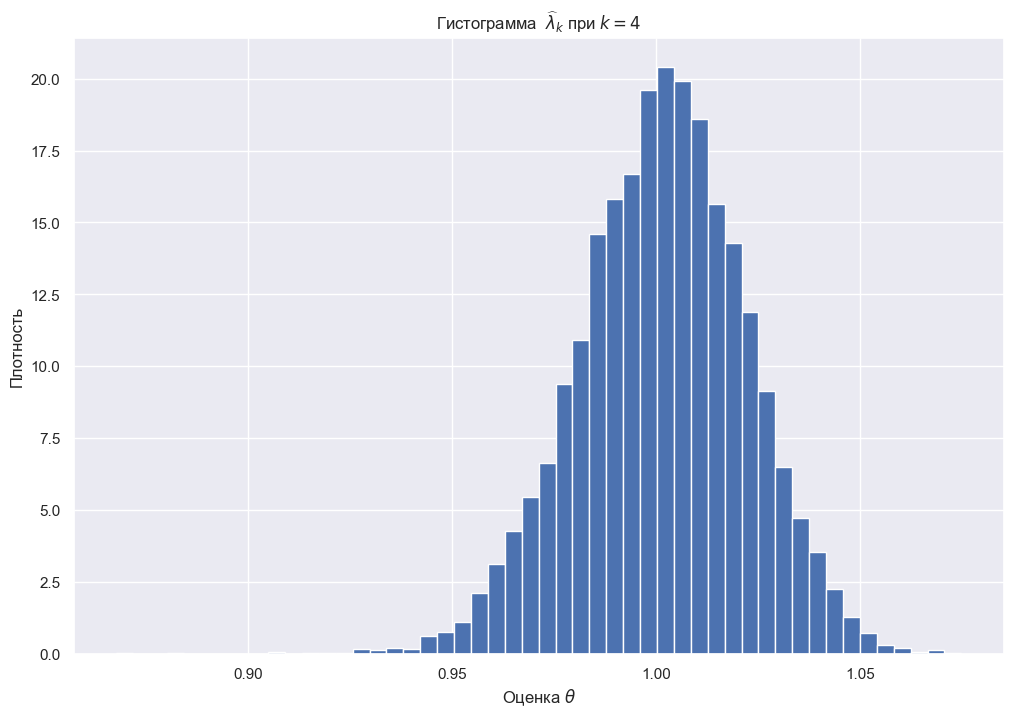

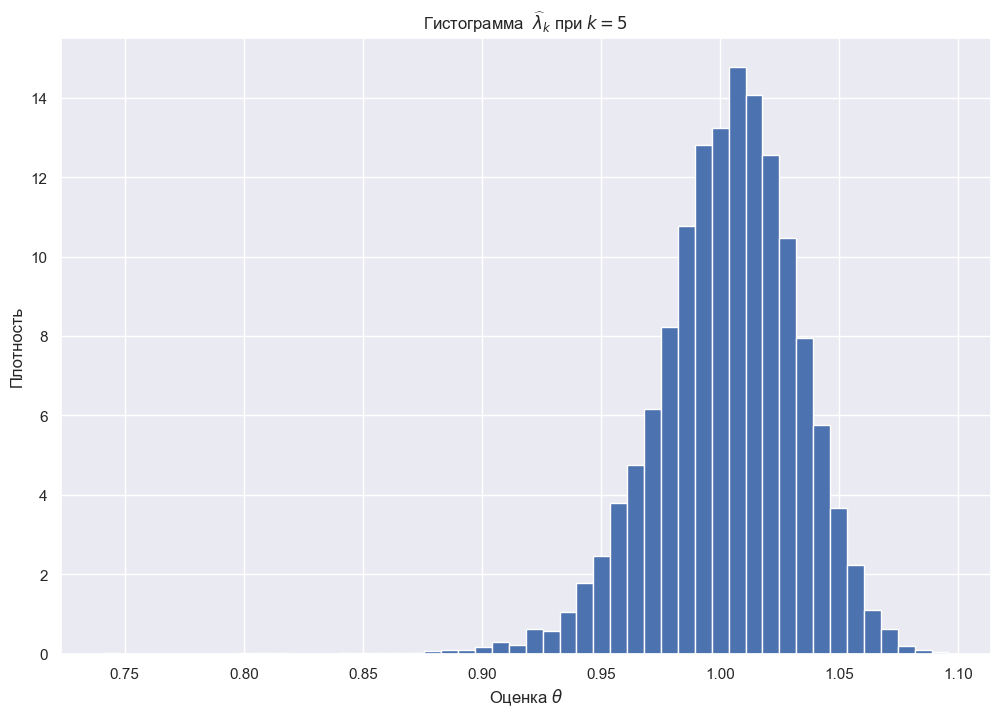

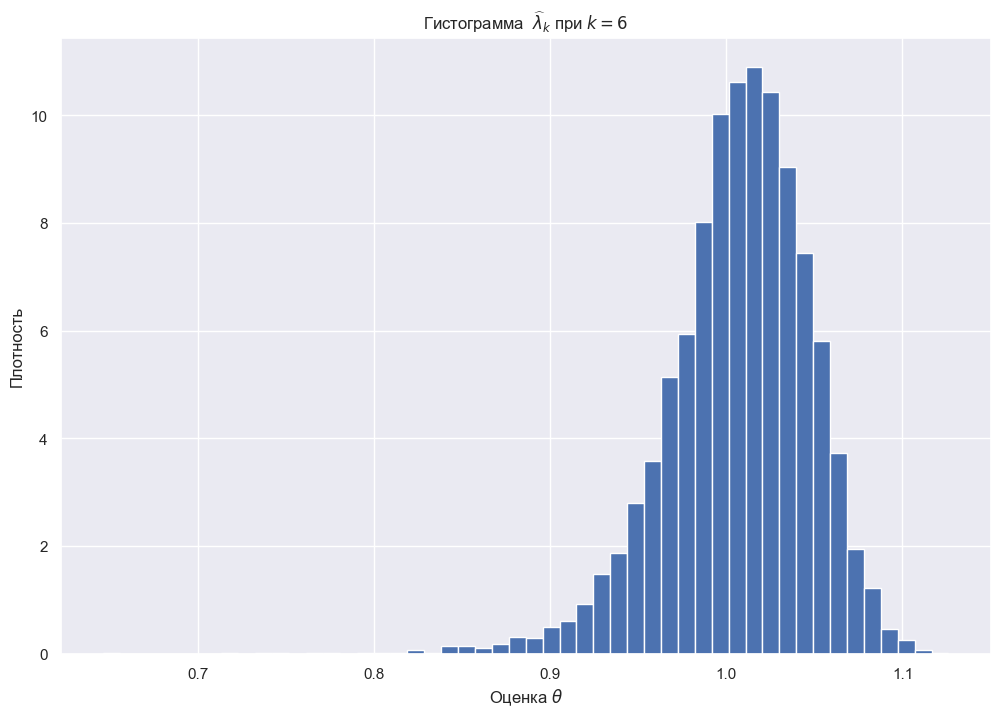

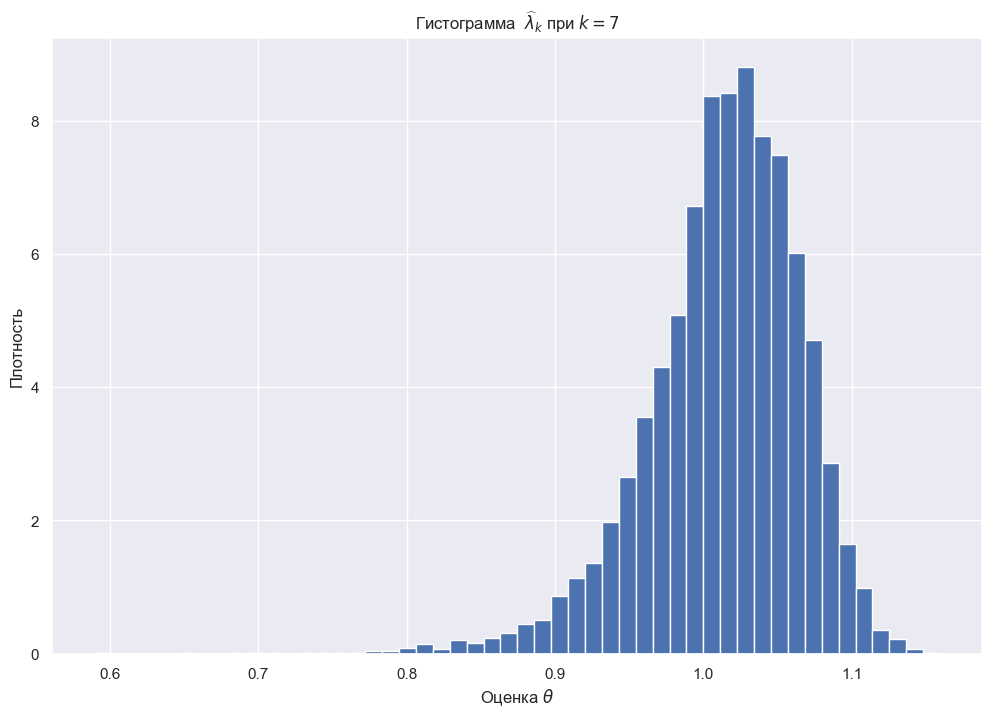

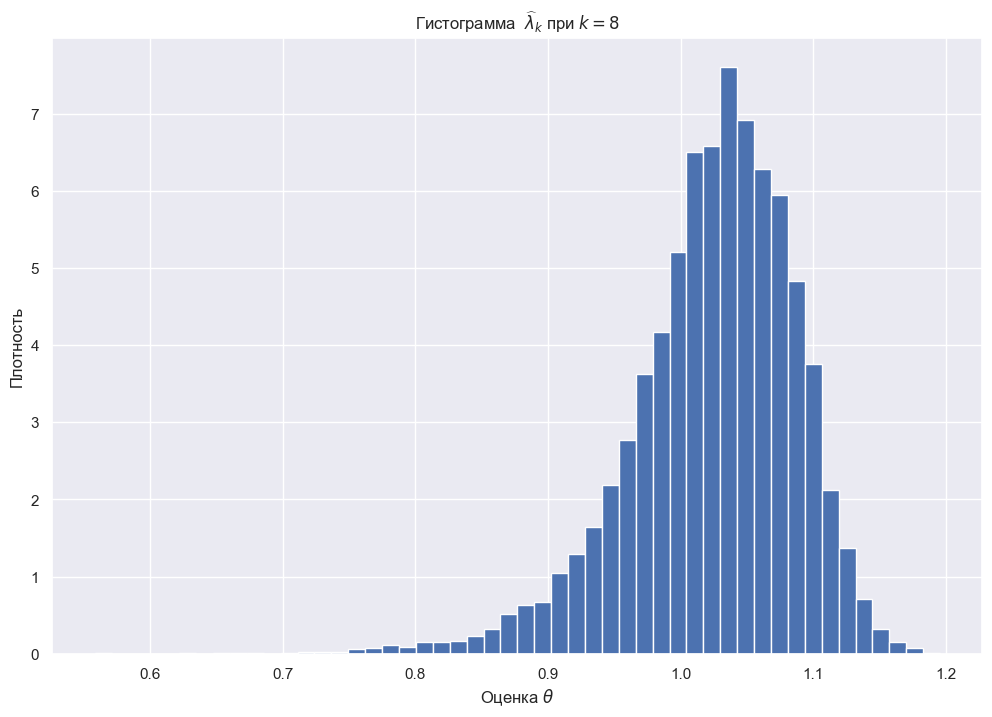

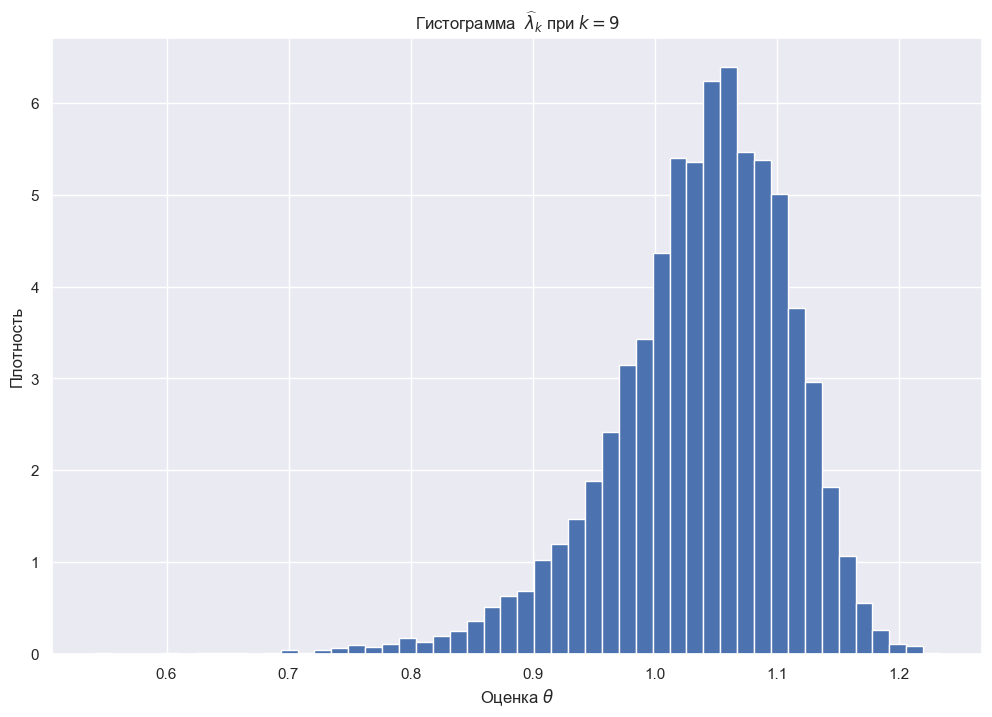

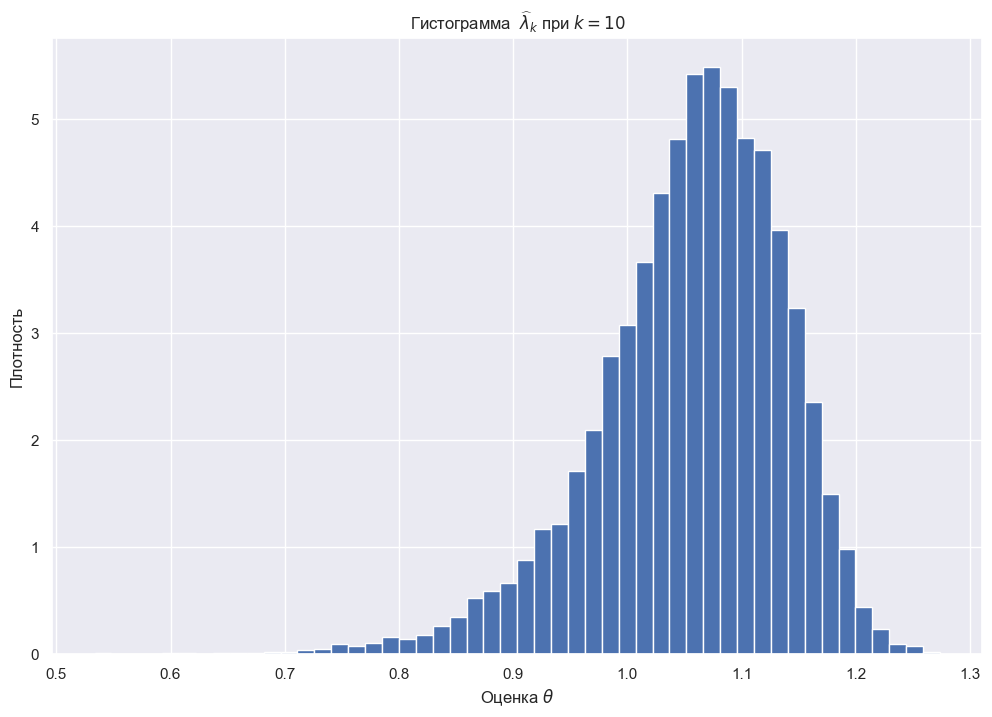

In [181]:
for estim, k in zip(estim_arr, k_array):
    plt.figure(figsize=(12, 8))
    plt.hist(estim, bins=50, alpha=1, density=True)
    plt.title(r'Гистограмма  $\widehat{\lambda}_k$ при $k= {%d}$' % (k))
    plt.xlabel('Оценка $\\theta$')
    plt.ylabel('Плотность')
    plt.show()

Получились графики нормального распределения с матожиданием около 1.

Являются ли данные оценки асимптотически нормальными? Проверьте это теоретически и моделированием -- постройте эмпирическую плотность распределения статистик $\sqrt{n}\left(\widehat\lambda_k - \lambda\right)$.

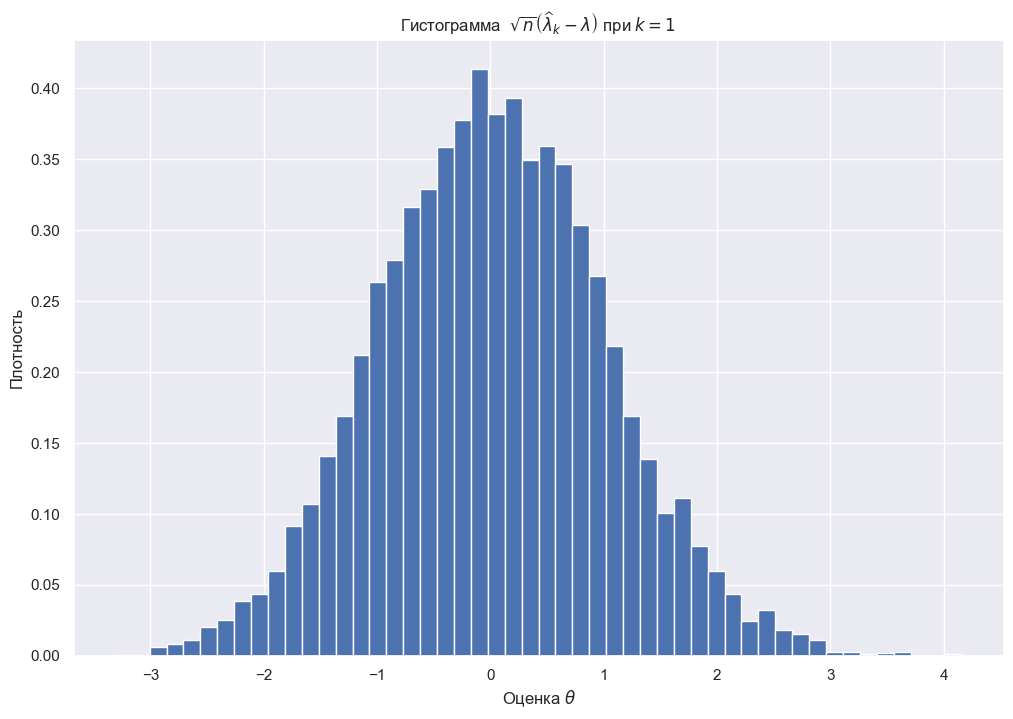

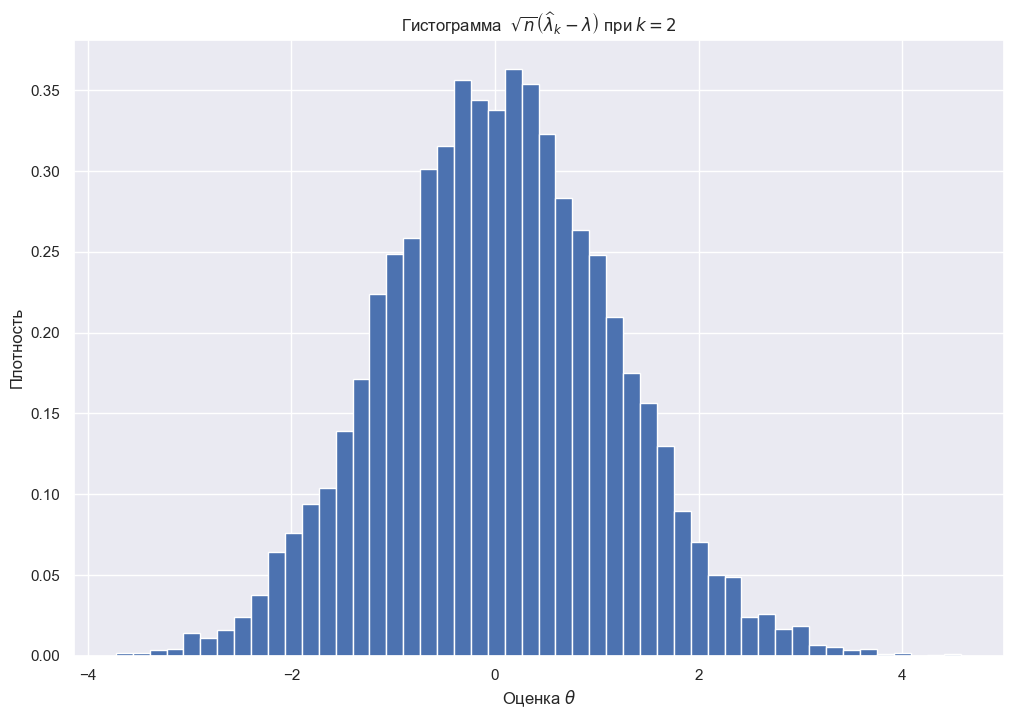

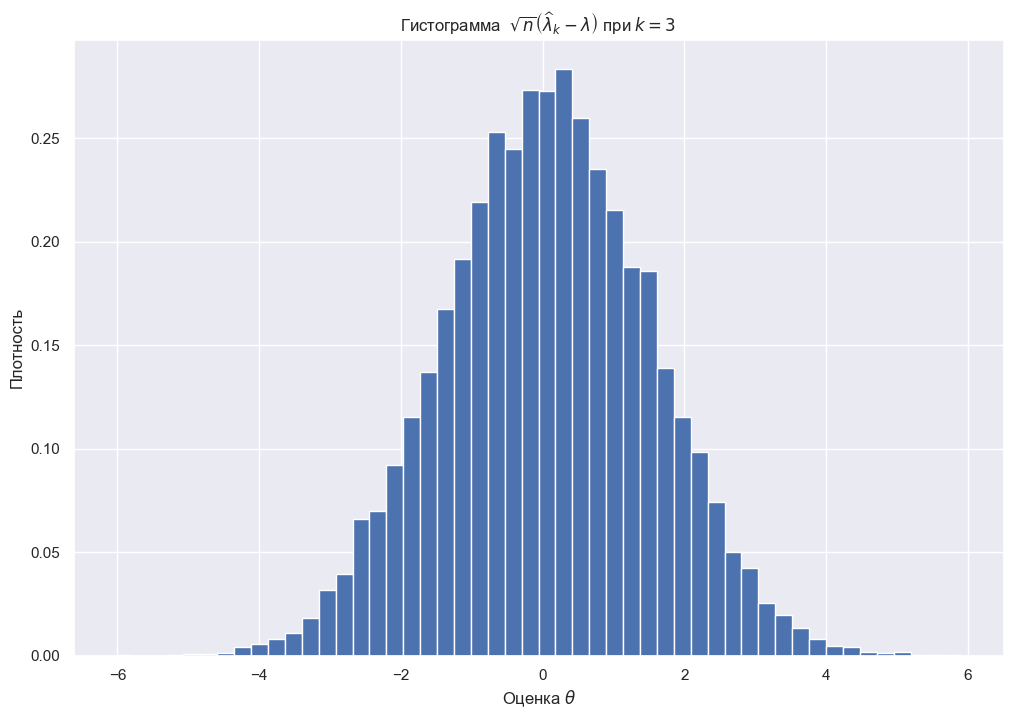

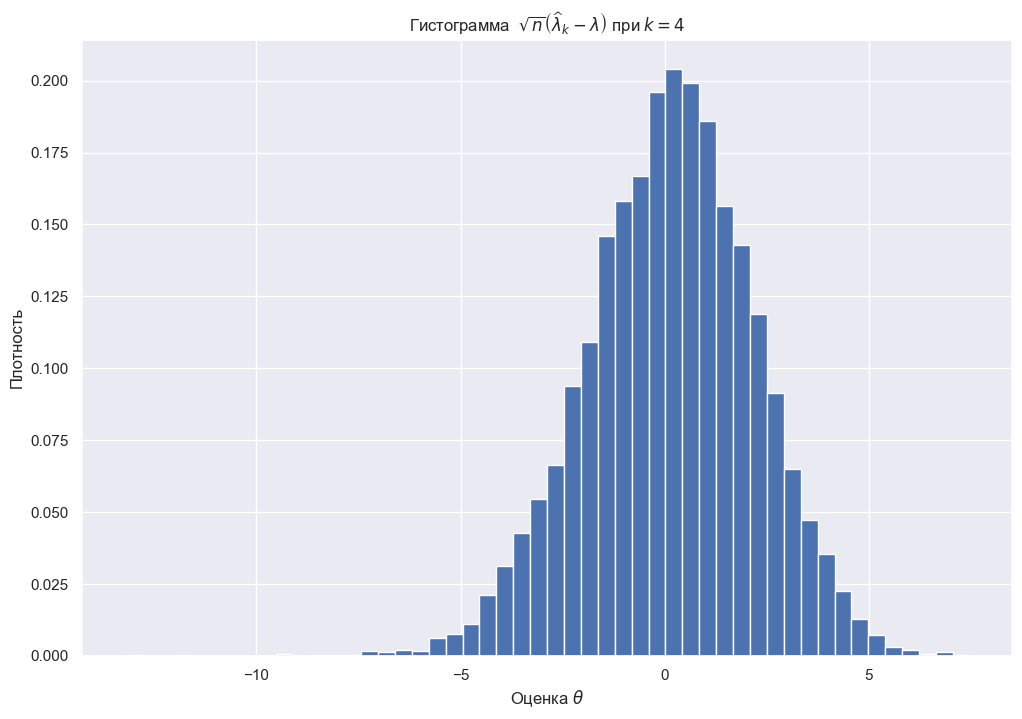

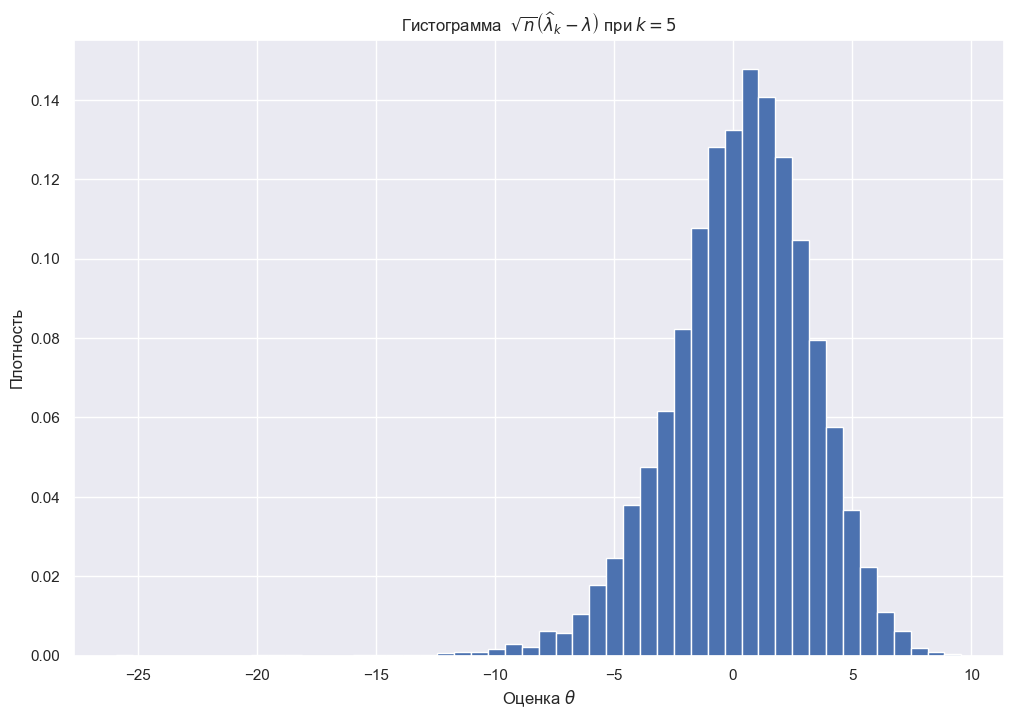

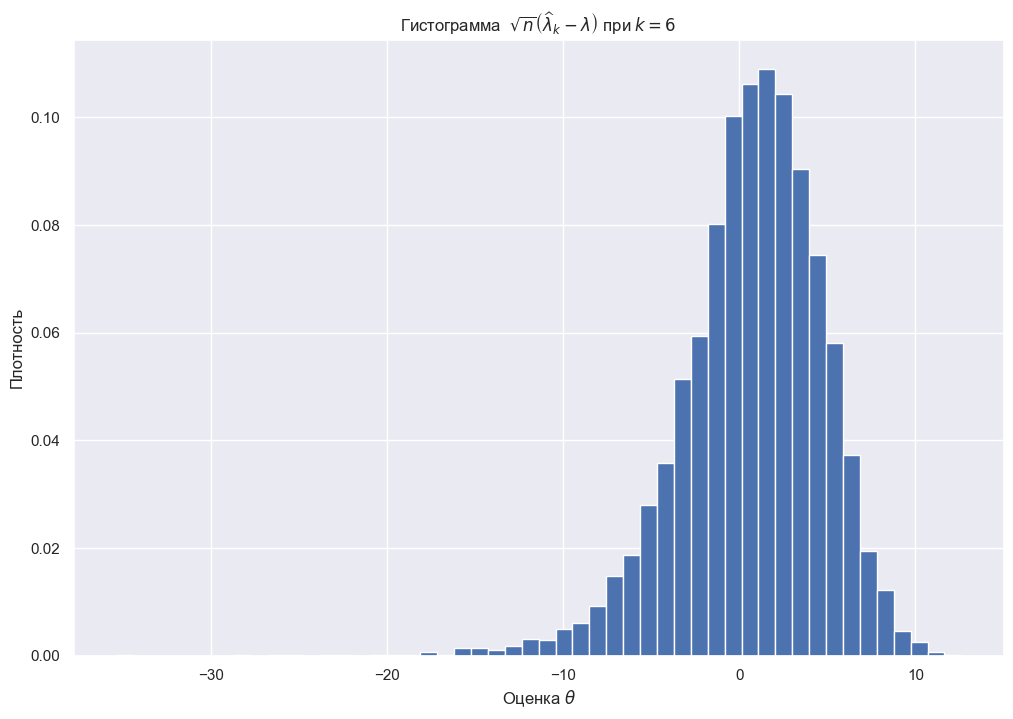

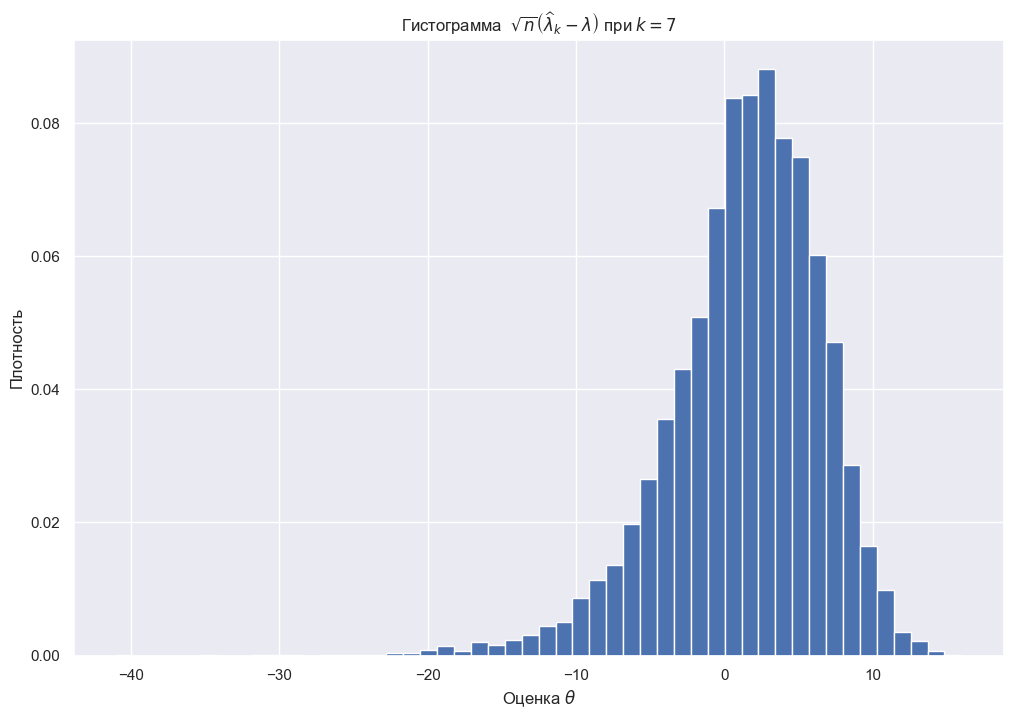

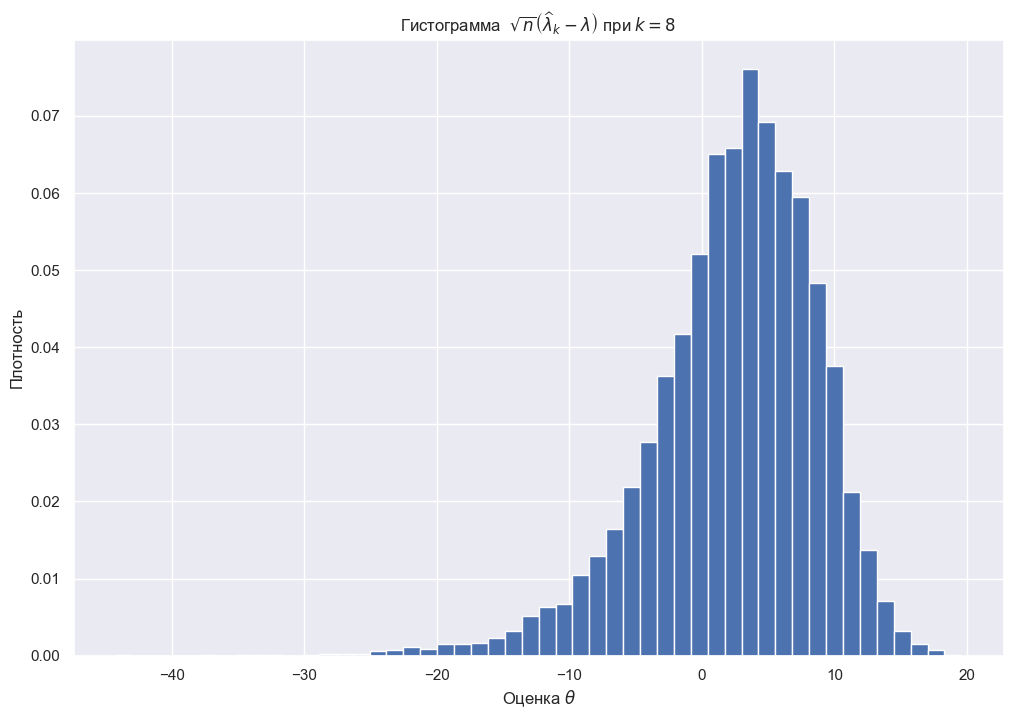

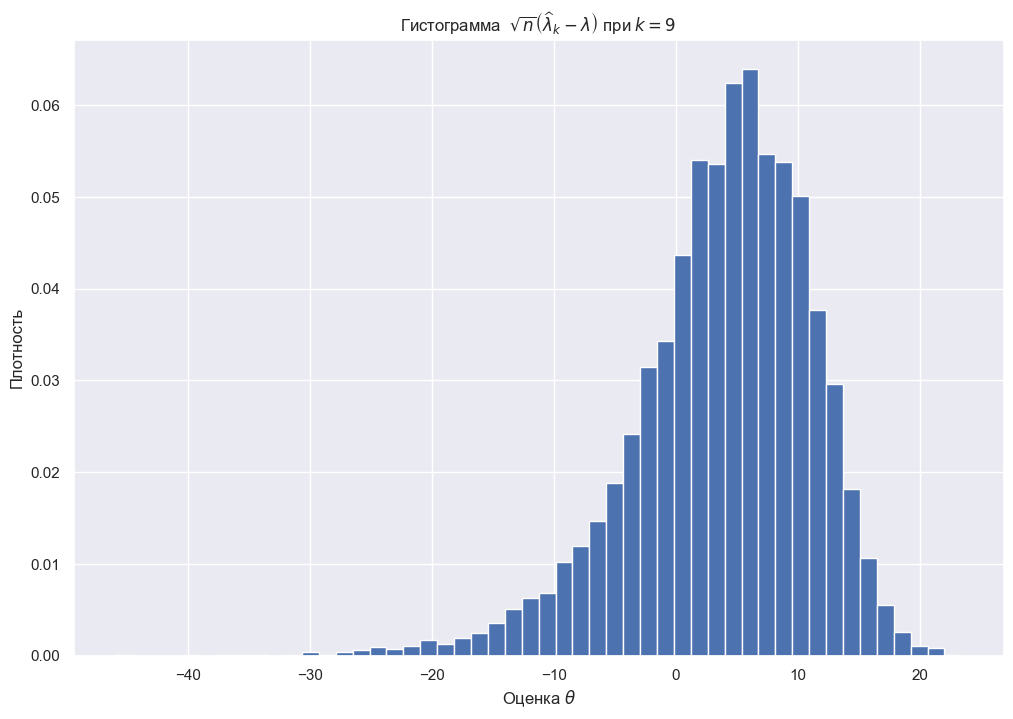

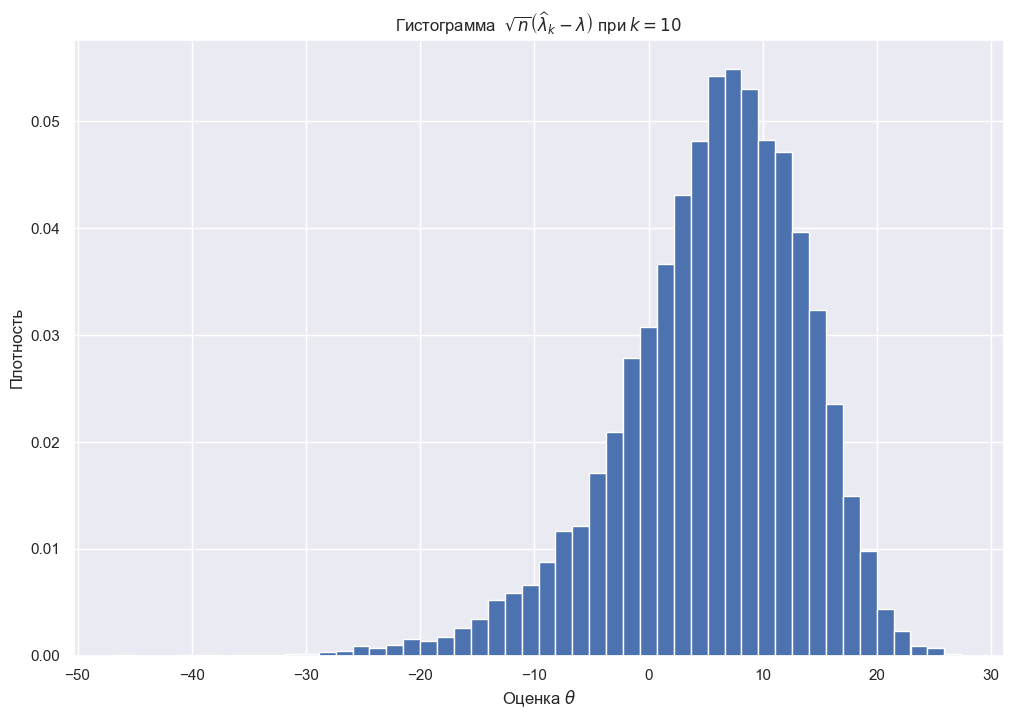

In [182]:
for estim, k in zip(estim_arr, k_array):
    plt.figure(figsize=(12, 8))
    plt.hist(np.sqrt(n) * (estim-lambda_param), bins=50, alpha=1, density=True)
    plt.title(r'Гистограмма  $\sqrt{n}\left(\widehat\lambda_k - \lambda\right)$ при $k= {%d}$' % (k))
    plt.xlabel('Оценка $\\theta$')
    plt.ylabel('Плотность')
    plt.show()

Получилось нормальное распределение, однако оно сдвигается в право с ростом k. Скорее всего это связано с слишком малым размером выборки.

Посчитайте дисперсию оценок для разных $k$ и разных размеров выборки. Сходится ли она к теоретической? Что Вы можете сказать о скорости сходимости?

In [183]:
empirical_variances = {}

for k in k_array:
    lambda_hat_arr = np.power(math.factorial(k)/(np.cumsum(np.power(samples,k), axis=1)/np.arange(1, n+1)) ,1/k)
    estim_arr = (lambda_hat_arr-lambda_param) * np.sqrt(np.arange(1, n+1))
    variance_arr = np.var(estim_arr, axis = 0)
    empirical_variances[k] = variance_arr



На одном графике изобразите плотности распределений оценок для разных $k$ и на основе графика сделайте выбор параметра. Обоснуйте его.

В каждом массиве дисперсий обрежем первые 5 значение, так как они слишком большие по сравнению с следующими и так график будет намного нагляднее. Также на всех графиках красным пунктиром изобразим теоретическую дисперсию.

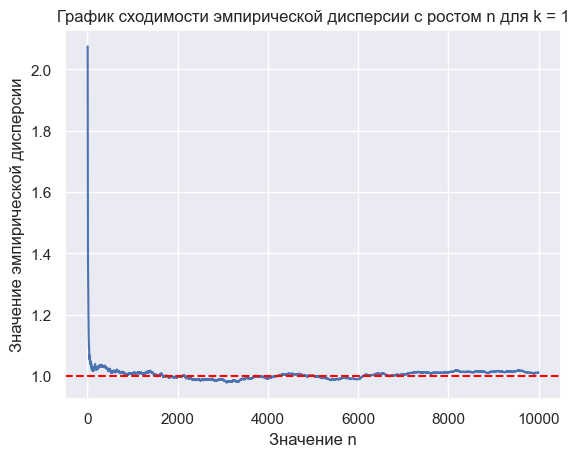

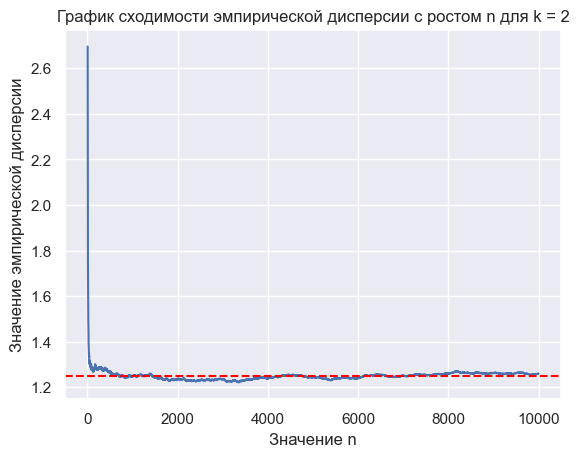

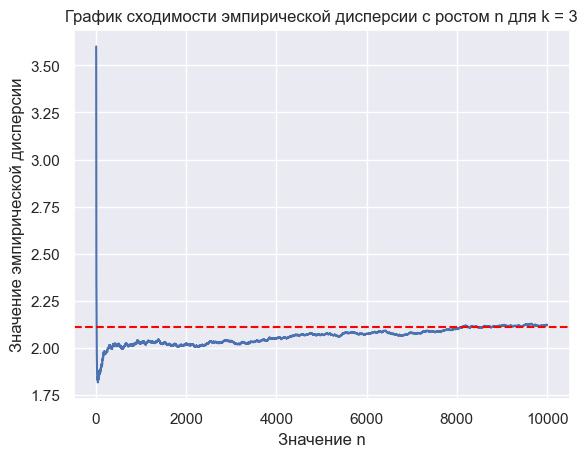

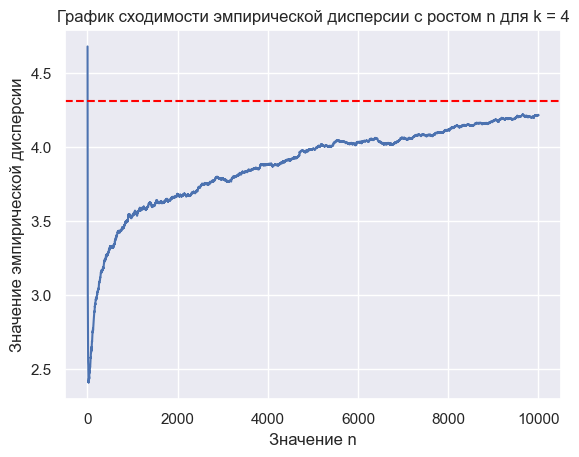

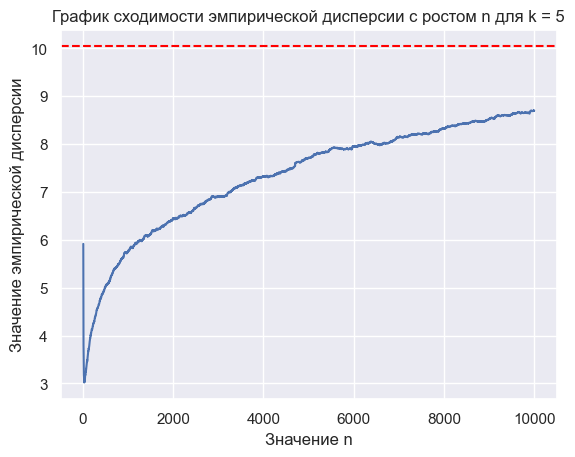

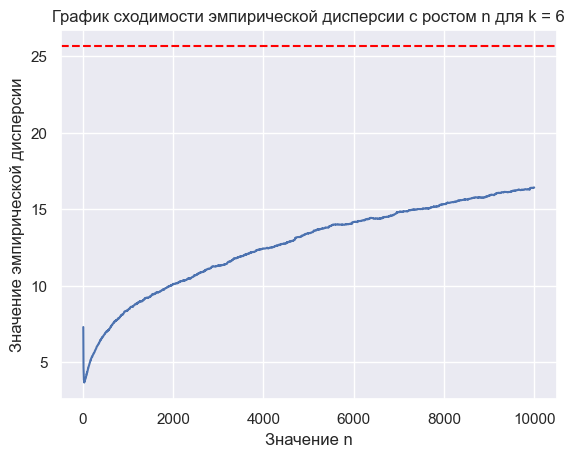

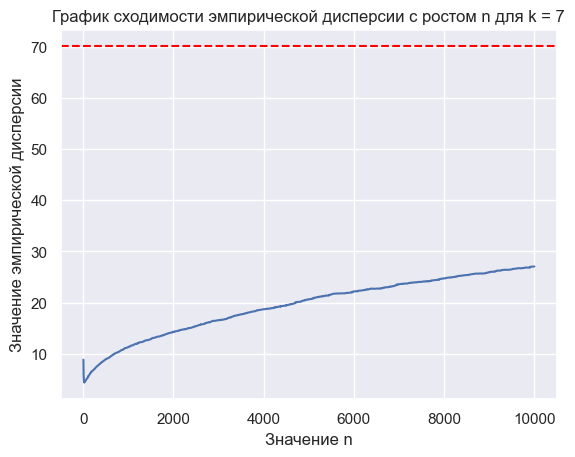

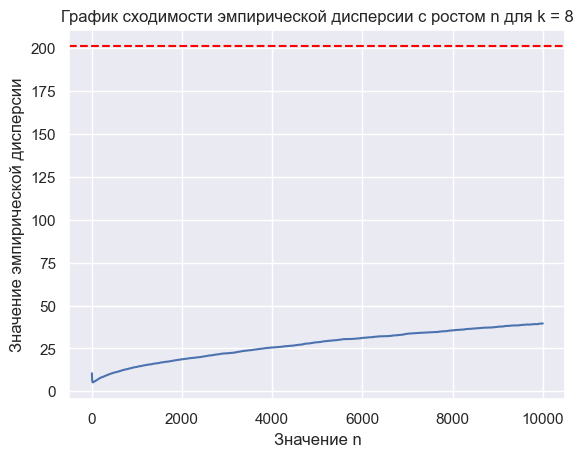

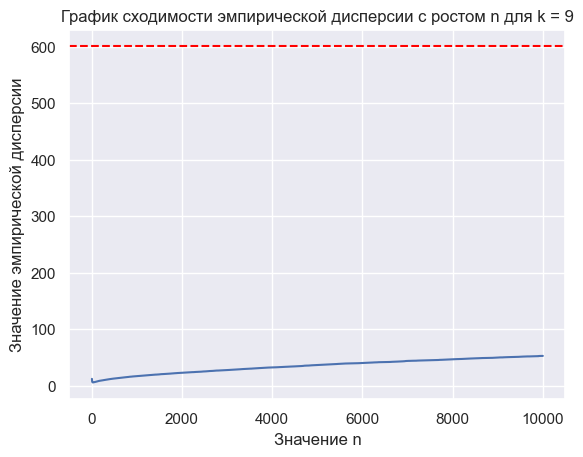

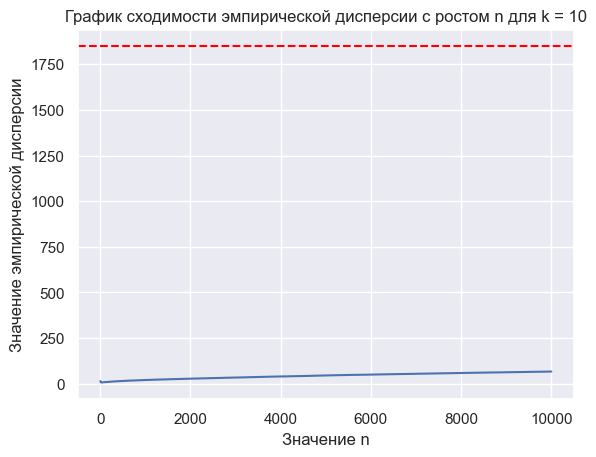

In [184]:
for k in k_array:
    plt.plot(np.arange(6, n+1), empirical_variances[k][5:])
    k = int(k)
    y = np.divide((math.factorial(2*k) - (math.factorial(k)**2)), (k**2 * math.factorial(k)**2)) * lambda_param**2
    plt.axhline(y=y, color='red', linestyle='--', label='y = 0.5')
    plt.title("График сходимости эмпирической дисперсии с ростом n для k = {}".format(k))
    plt.xlabel("Значение n")
    plt.ylabel("Значение эмпирической дисперсии")
    plt.show()

Видно, что чем больше k, тем медлеенее дисперсия сходится.

Для одной выборки постройте графики $\left|\hat{\lambda}_k - \lambda\right|$ и сравните скорости сходимости к нулю при увеличении размера выборки.

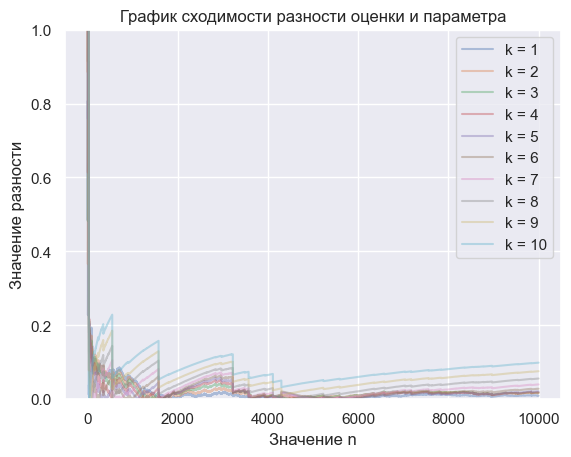

In [185]:
sample = samples[0]
for k in k_array:
    lambda_hat_arr = np.power(math.factorial(k)/(np.cumsum(np.power(sample,k))/np.arange(1, n+1)) ,1/k)
    plt.plot(np.arange(1, n+1), np.abs(lambda_hat_arr - lambda_param), alpha = 0.4, label = "k = {}".format(k))
    plt.ylim(0, 1)
    plt.title("График сходимости разности оценки и параметра")
    plt.xlabel("Значение n")
    plt.ylabel("Значение разности")
plt.legend()
plt.show()

Аналогично как и с дисперсией, с ростом k оценка все медленее сходится к параметру.

Сделайте вывод.


__Вывод:__ Мы поняли, что оценка $\hat{\lambda}_k$ хоть и является асимптотически нормальной, но сходится достаточно медленно при больших k.

### Задача 3

Кианские провинции до сих пор надеются отделиться от Новой Империи, и поэтому планируют саботировать Ордалию. К их счастью, число урожая в пустынных землях на юге подчиняется распределению Коши, которое отличается существенно от двух распределений из задач 1 и 2. Чем отличается? Как это повлияет на оценивание его параметра сдвига?

Распределение Коши отличается тем, что у него нет мат. ожидния, дисперсии и k-х моментов. Это повлияет на то, что не получится оценить парметр сдвига с помощью среднего.

В этой задаче Вам нужно показать на примере, как построение интуитивно понятной оценки без теоретического обоснования может дать неадекватный результат.

Ниже напишите, какое поведение Вы ожидаете от оценки среднего и медианы. Обоснуйте ожидания, ссылаясь на теоремы и задачи из курса теории вероятностей:

Ответ: оценки среднего плохо оценивает параметр сдвига в силу того, что у него нет математического матожидания, а значит оценка не будет несмещенной. У оценки медианы ожидается хорошее поведение, так как на семинаре доказывалась ее асимптотическая нормальность в одной из задач.

Для распределения Коши моделированием изучите поведение оценки параметра сдвига при помощи среднего и медианы. У какой из этих оценок лучше асимптотические свойства?

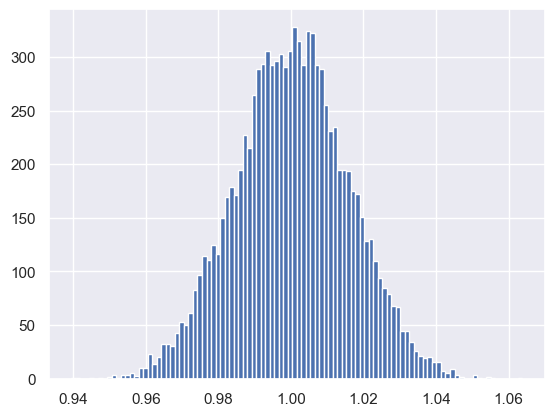

In [186]:
loc = 1

samples = sps.cauchy.rvs(loc = loc, scale = 1, size = (n, N))

mean_estim_arr = np.mean(samples, axis = 1)

median_estim_arr = np.median(samples, axis = 1)

plt.hist(median_estim_arr, bins = 100)
plt.show()

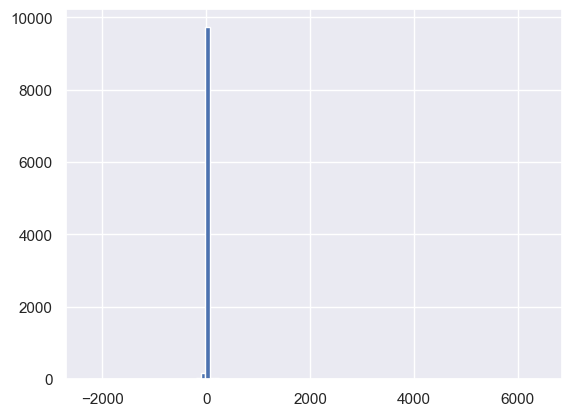

In [187]:
plt.hist(mean_estim_arr, bins = 100)
plt.show()


По графикам медианы и среднего трудно что-либо сказать, кроме того, что у медианы оценка имеет нормальное распределение. Сделаем аналогичные гистограммы для $\sqrt{n}(\theta^* - \theta)$

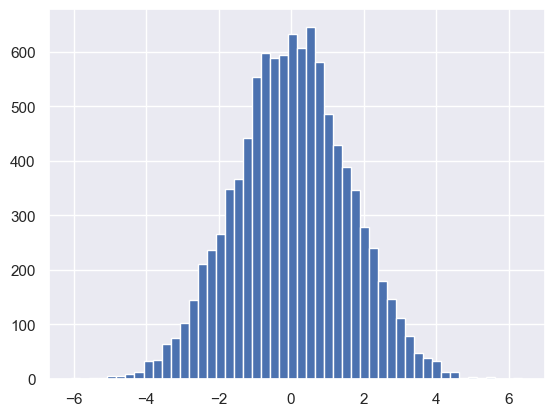

In [188]:
plt.hist(np.sqrt(n) * (median_estim_arr - loc), bins = 50)
plt.show()

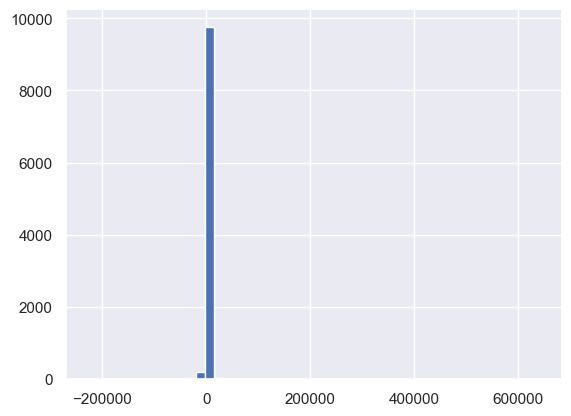

In [189]:
plt.hist(np.sqrt(n) * (mean_estim_arr - loc), bins = 50)
plt.show()

Видно, что гистограмма плотности распределения оценки медианы похожа на нормальную, а оценки среднем нет. Это значит, что оценка медианой является ассимптотический нормальной, что подтверждает теоретические ожидания.

Проверьте свои теоретические ожидания, написанные в начале задачи. Моделированием проверьте, какие оценки состоятельны и асимптотически нормальны.

Проверим оценки на состоятельность. Для этого построим графики сходимости оценкок с ростом n на разных выборках.

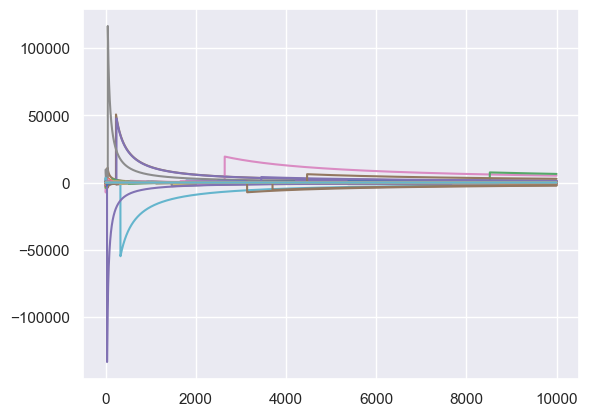

In [190]:
for i in np.arange(N):
    cum_mean = np.cumsum(samples[i]) / np.arange(1, n+1)
    plt.plot(np.arange(1, n + 1), cum_mean)


Сделаем n=N=1000, так как кумулятивная медиана считается очень долго.

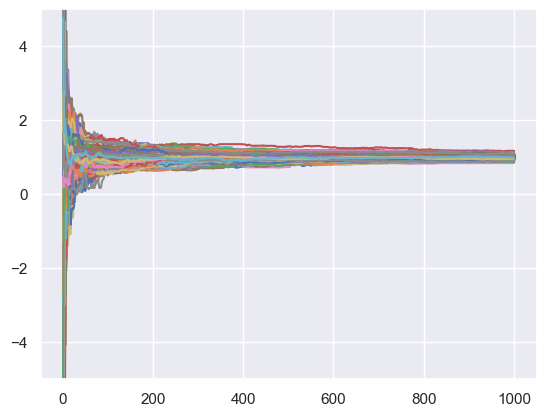

In [191]:
def cummedian(arr, size):
    cum_medians = np.zeros(size)
    for i in np.arange(size):
        cum_medians[i] = np.median(arr[:i + 1])
    return cum_medians
n= 1000
N = 1000
cum_medians = []
for i in np.arange(N):
    cum_median = cummedian(samples[i], n)
    cum_medians.append(cum_median)
    plt.plot(np.arange(1, n + 1), cum_median)
plt.ylim(-5, 5)
plt.show()

Видно, что у оценки медианой сходится значения по всем траекториям сходится к параметру сдвига, однако у оценки средним постоянно есть какие-то траектории, которые делают резкие скачки вверх и поэтому не сходятся. 

Изучите поведение эмпирической дисперсии оценок среднего и медианы. Какая из них сходится? С какой скоростью? Для проверки постройте график какой-то детерминированной функции с такой же скоростью сходимости.

Апроксимируем функцией $\frac{1}{x} + \frac{\pi^2}{4}$, так как теоретическая асимптотическая дисперсия получилась $\frac{\pi^2}{4}$.

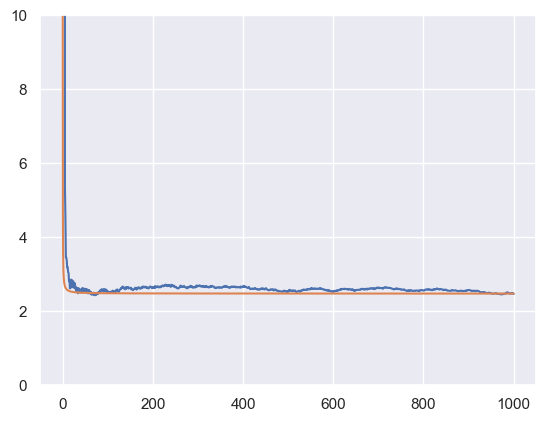

In [192]:
cum_medians = np.array(cum_medians)
median_vars = np.var(np.sqrt(np.arange(1, n+1)) * (cum_medians - loc) , axis=0)
plt.plot(np.arange(1, n+1), median_vars)
x = np.linspace(0.1, 1000, 100000)
y = 1/x + (np.pi**2/4)
plt.plot(x, y)
plt.ylim(0, 10)
plt.show()

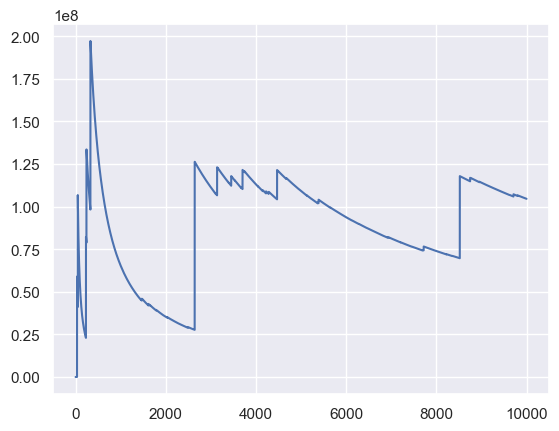

In [193]:
n = 10000
N = 10000
cum_means = np.cumsum(samples, axis = 1) / np.arange(1, n + 1)
mean_vars = np.var(np.sqrt(np.arange(1, n+1)) * (cum_means - loc) , axis=0)
plt.plot(np.arange(1, n+1), mean_vars)

**Вывод:** Видно, что у оценки медианой дисперсия сходится к ассимптотической при чем сходится со скоростью $\frac{1}{x}$. А у оценки средним дисперсия никуда не сходится, так как график постоянно имеет резкие подъёмы вверх.

### Задача 4

Древние свитки из Сареотской библиотеки хранят знания двух древних волшебников севера --- Гливенко и Кантелли. Два мага-гностика придумали ультимативный способ оценивания распределений количества чего угодно. Их способом пользовались короли севера ещё две тысячи лет назад, во времена Первой Ордалии. Аспект-Император отдал приказ проверить, верны ли их выкладки до сих пор.

Эта задача посвящена проверке теоремы Гливенко-Кантелли, как основного теоретического результата курса. Условия посмотрите в методичке или сходите на лекцию старшего магистра колдовства и чародейства Савёлова М.П.

Сгенерируйте $N$ выборок $X_1,\dots, X_N$ размера $N$ из стандартного нормального распределения для $N = 10^4$.

In [194]:
np.random.seed(42)
N = 10000
samples = sps.norm.rvs(size=(N, N))


Для всех $n \leqslant N$ первой выборки посчитайте эмпирическую функцию распределения.


In [195]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

# ecdfs: typing.List[ECDF] = [ECDF(X.sample[:i]) for i in range(1, len(X) + 1)]

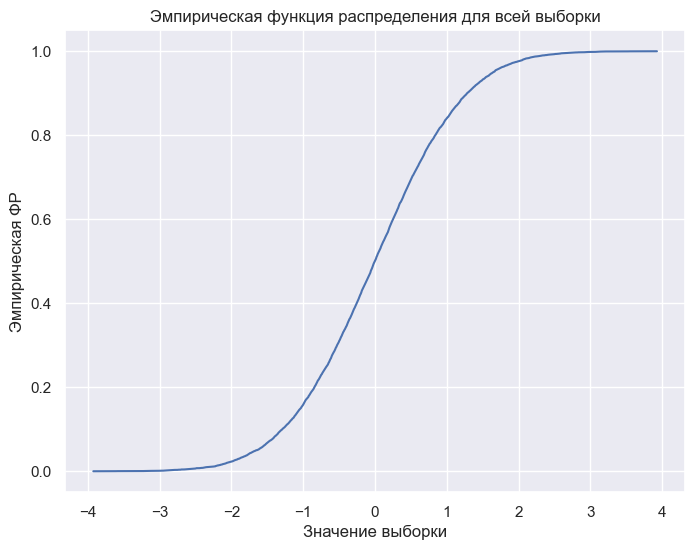

In [196]:


ecdfs = ([ECDF(samples[0][:i]) for i in range(1, N + 1)])

ecdf_final = ecdfs[-1]

x_values = np.linspace(min(samples[0]), max(samples[0]), 1000)

plt.figure(figsize=(8, 6))
plt.plot(x_values, ecdf_final(x_values))
plt.title('Эмпирическая функция распределения для всей выборки')
plt.xlabel('Значение выборки')
plt.ylabel('Эмпирическая ФР')
plt.grid(True)
plt.show()

По графику видно, что эмпирическая функция распределения ведет себя также как и теоретическая.

Для некоторых $n$ (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`) и сравните каждый из них с истинной функцией распределения (количество графиков равно количеству различных значений $n$).

Проверьте выполнение теоремы Гливенко-Кантелли.

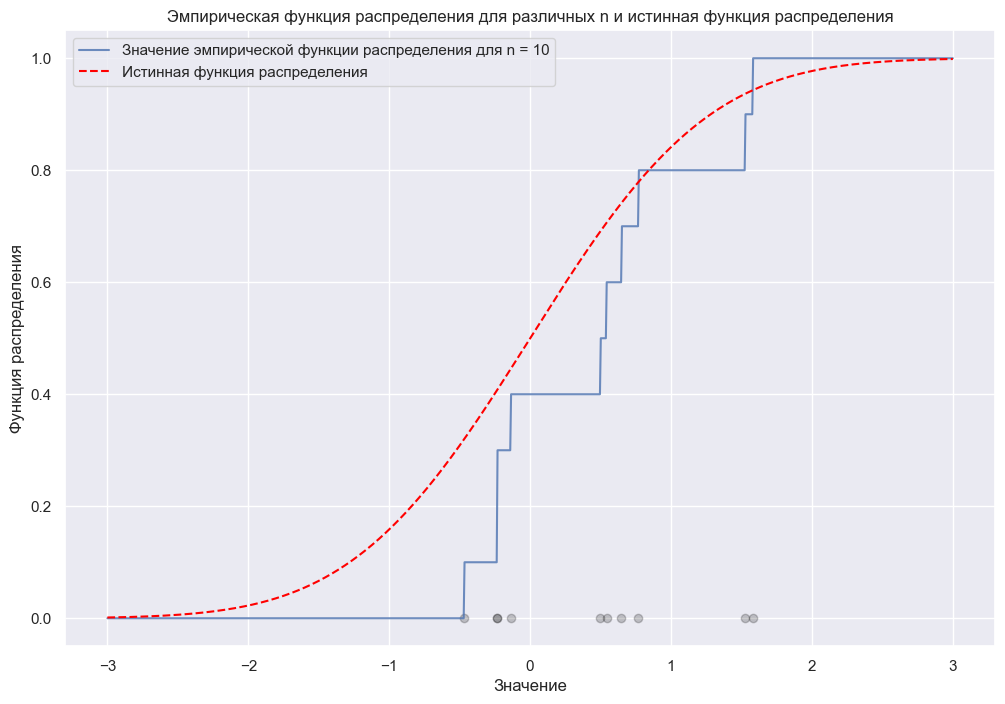

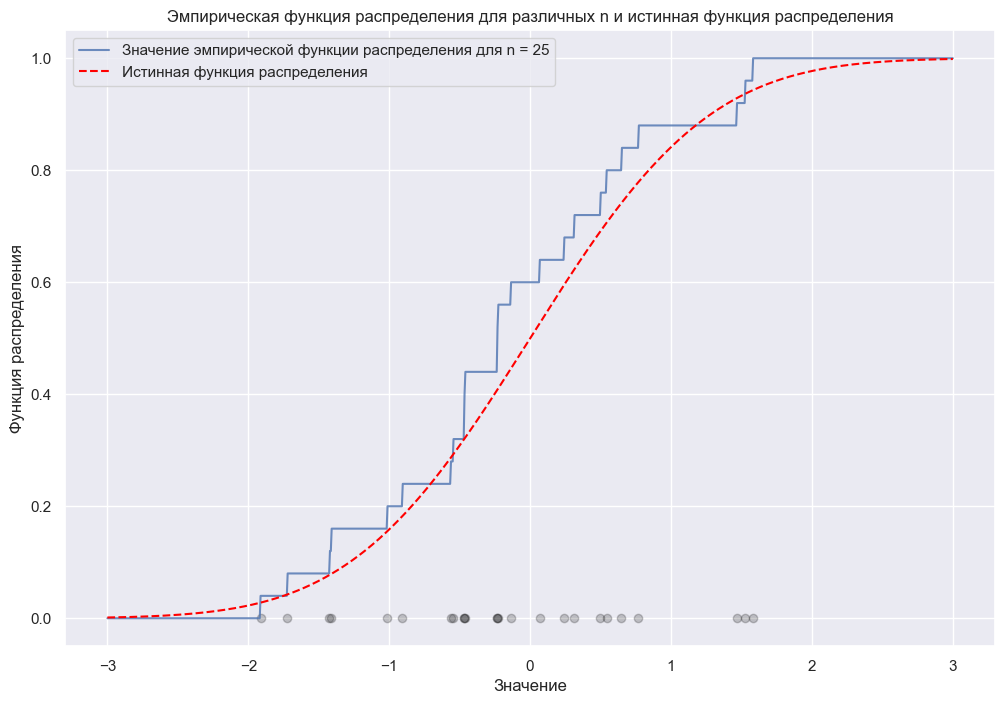

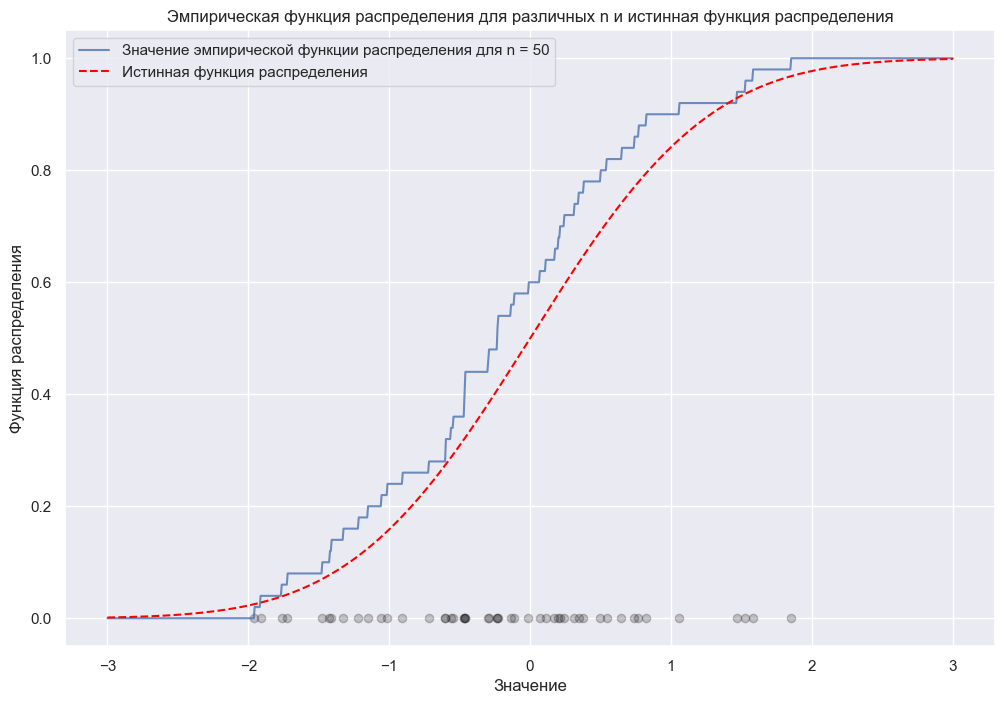

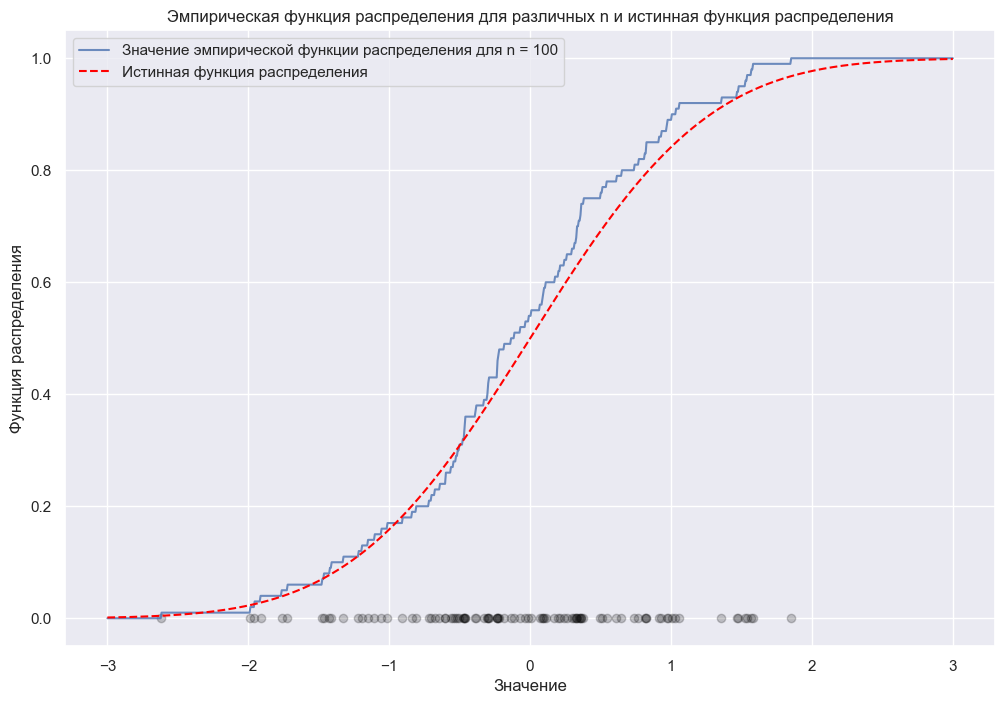

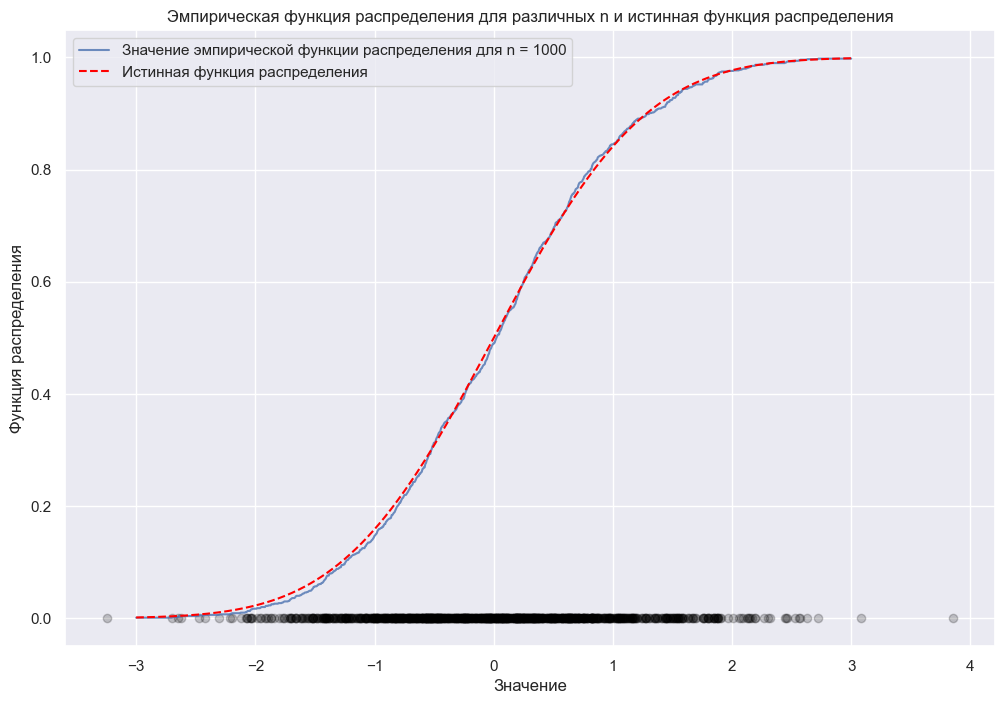

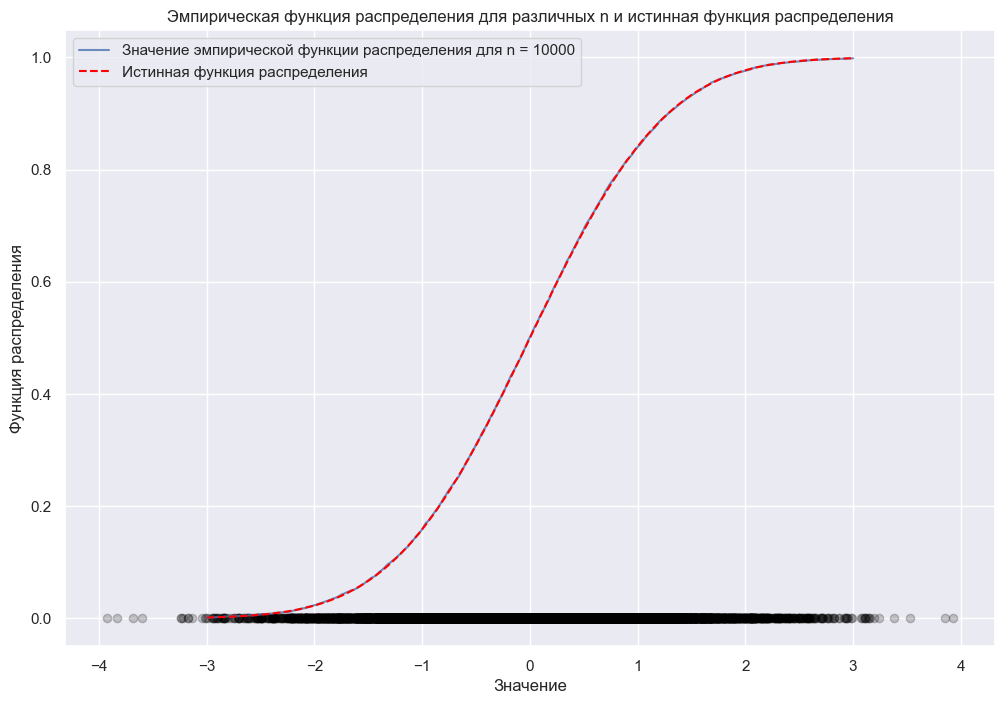

In [197]:
n_values = [10, 25, 50, 100, 1000, N]

x_values = np.linspace(-3, 3, 1000) 

for n in n_values:
    plt.figure(figsize=(12, 8))
    ecdf = ecdfs[n-1]

    # Построение графика ЭФР
    plt.plot(x_values, ecdf(x_values), label=f'Значение эмпирической функции распределения для n = {n}', alpha=0.8)

    # Нанесение точек "скачков" на ось абсцисс
    plt.scatter(samples[0][:n], np.zeros_like(samples[0][:n]), alpha=0.2, color='black')
    plt.plot(x_values, sps.norm.cdf(x_values), label='Истинная функция распределения', color='red', linestyle='--')
    plt.title('Эмпирическая функция распределения для различных n и истинная функция распределения')
    plt.xlabel('Значение')
    plt.ylabel('Функция распределения')
    plt.legend()
    plt.grid(True)
    plt.show()


По полученным графикам видно, что с ростом n эмпирическая функция распределения действительно сходится равномерно к теоретической. И с ростом n скачков у функции становится все больше, то есть функция сглаживается с ростом n.

Для всех $n ≤ N$ посчитайте значение $D_n = \displaystyle{\sup_{x \in \mathbb R}} | \hat{F}_n(x) - F(x)|$ для первой выборки. Промоделируйте поведение статистики $\sqrt{n}D_n$. Наблюдается ли сходимость их распределений на графиках?


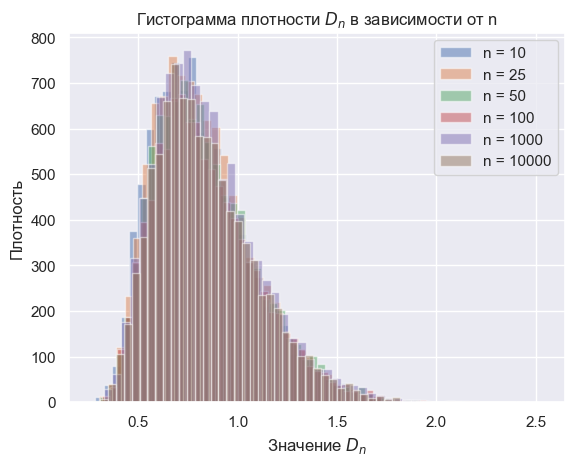

In [198]:
ecdfs = []
for i in np.arange(N):
    ecdf = {}
    for n in n_values:
        ecdf[n] = ECDF(samples[i][:n])
    ecdfs.append(ecdf)

D_n_array = {}
for n in n_values:
    D_n_array[n] = [np.max(np.abs(ecdfs[i][n](x_values) - sps.norm.cdf(x_values))) for i in np.arange(N)]
    D_n_array[n] = np.array(D_n_array[n])
    plt.hist(D_n_array[n] * np.sqrt(n), bins= 50, alpha = 0.5, label="n = {}".format(n))
    plt.title(r"Гистограмма плотности $D_n$ в зависимости от n")
    plt.ylabel("Плотность")
    plt.xlabel(r"Значение $D_n$")
plt.legend()
plt.show()

По гистограмме понять сходимость сложно так что построим еще KDE-plot.

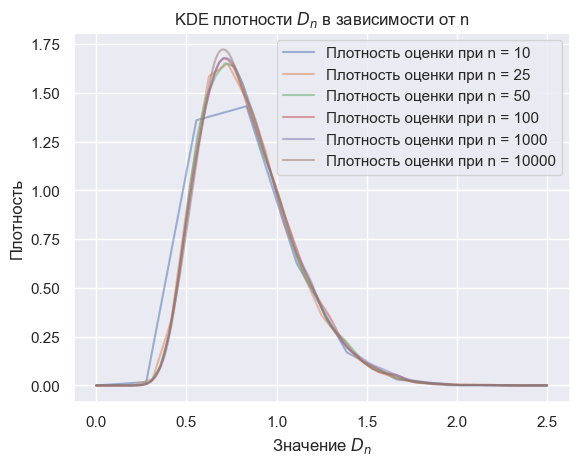

In [199]:

for n in n_values:
    kernel_values = sps.gaussian_kde(D_n_array[n] * np.sqrt(n))(np.linspace(0, 2.5, n))
    plt.plot(np.linspace(0, 2.5, n), kernel_values, alpha=0.5, label="Плотность оценки при n = {}".format(n))
    plt.title(r"KDE плотности $D_n$ в зависимости от n")
    plt.ylabel("Плотность")
    plt.xlabel(r"Значение $D_n$")
plt.legend()
plt.show()

Видно, что сходимость распределений действительно есть, так как эмпирические плотности сходятся к какой-то одной плотности.

Пища для ума: если Ваша эмпирическая плотность сходится к чему-то, то это не просто так! Поищите на просторах интернета, учебников и бесед с умными людьми, куда должна сходиться статистика $\sqrt{n}D_n$. Подумайте, для чего может быть полезен этот теоретический результат.

Ответ: по теореме Колмогорова данная статистика сходится к распределению Колмогорова. Этот результат позволяет уточнить сходимость разности эмпирической и теоретической функции распределения.

Сделайте вывод о важности теоремы Гливенко-Кантелли в численном анализе. Какие методы, применяемые Вами в других задачах неявно основываются на этой теореме?

**Вывод:** Теорема Гливенко-Кантелли позволяет понять к чему сходятся эмпирические функции распределения, а значит примерно понимать их поведение.

### Задача 5

Оказывается, нельзя оценивать распределения оценок на глаз простым всматриванием в графики! Поэтому гностики из крепости Нрон изобрели новое заклинание -- QQ-plot. В этой задаче Вам предстоит научиться проверять распределения на принадлежность семействам при помощи этого инструмента.

В этой задаче Вам предлагается изучить инструмент QQ-plot и сделать на его основе выводы о равенстве распределений.

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $\mathrm U{[0, \theta]}$ для $\theta=1$ размера $n=40$. Моделированием статистик $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$ изучите их распределение. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

Указание: можно взять код и результаты из задачи 1. Просто скопируйте их сюда.

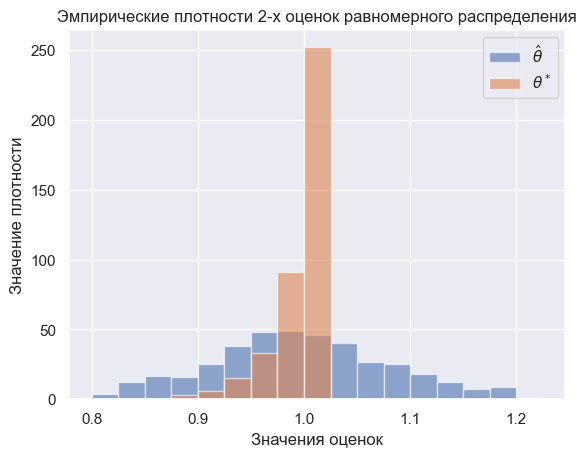

In [200]:
N_samples = 400
n = 40
theta = 1
samples = sps.uniform.rvs(loc = 0, scale = theta, size = (N_samples, n))
theta_hat = 2 * np.mean(samples, axis = 1)
theta_star = (n+1)/n * np.max(samples, axis = 1)
bins = [i / 40 + 0.8 for i in range(18)]

plt.hist(theta_hat, bins=bins, label = r'$\hat\theta$', alpha = 0.6)
plt.hist(theta_star, bins=bins, label = r'$\theta^*$', alpha = 0.6)
plt.title("Эмпирические плотности 2-х оценок равномерного распределения")
plt.xlabel("Значения оценок")
plt.ylabel("Значение плотности")
plt.legend()
plt.show()

Промоделируйте статистики $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$. К чему сходятся их распределения с ростом $n$?

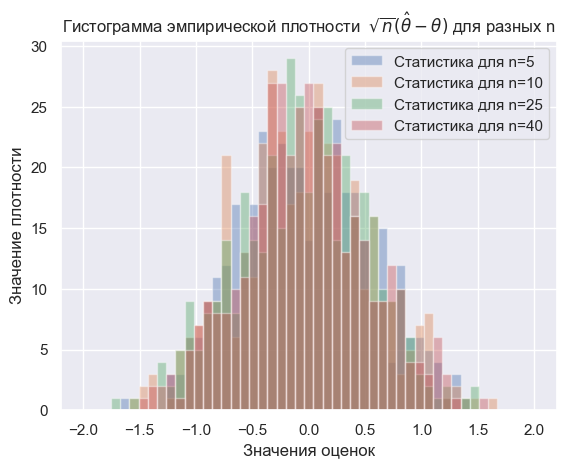

In [201]:
estim1 = np.sqrt(np.arange(1, n+1)) * (2 * np.cumsum(samples, axis = 1)/np.arange(1, n + 1) - theta)
estim2 = 1 - np.arange(1, n+1) * (((np.arange(1, n+1) + 1)/np.arange(1, n+1)) *  np.maximum.accumulate(samples, axis = 1) - theta)
n_values = [5 ,10, 25, n]
bins = np.linspace(-2, 2, 50)
for n in n_values:
    plt.hist(np.transpose(estim1)[n - 1], alpha = 0.4, bins = bins, label = 'Статистика для n={}'.format(n))
plt.title(r"Гистограмма эмпирической плотности  $\sqrt{n} (\hat\theta - \theta)$ для разных n")
plt.xlabel("Значения оценок")
plt.ylabel("Значение плотности")
plt.legend()
plt.show()

По полученной гистограмме ничего не понятно поэтому сделаем KDE.

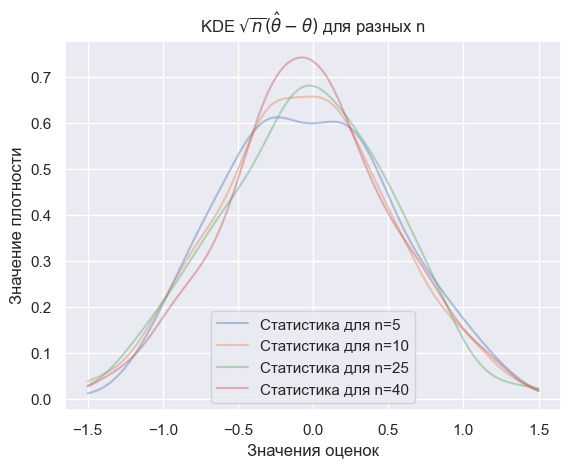

In [202]:
x_values = np.linspace(-1.5, 1.5, 1000)
for n in n_values:
    kde = sps.gaussian_kde(np.transpose(estim1)[n - 1])
    plt.plot(x_values, kde(x_values), label = 'Статистика для n={}'.format(n), alpha = 0.4)
plt.legend()
plt.title(r"KDE $\sqrt{n} (\hat\theta - \theta)$ для разных n")
plt.xlabel("Значения оценок")
plt.ylabel("Значение плотности")
plt.show()

Построим отдельно KDE для самого большого n.

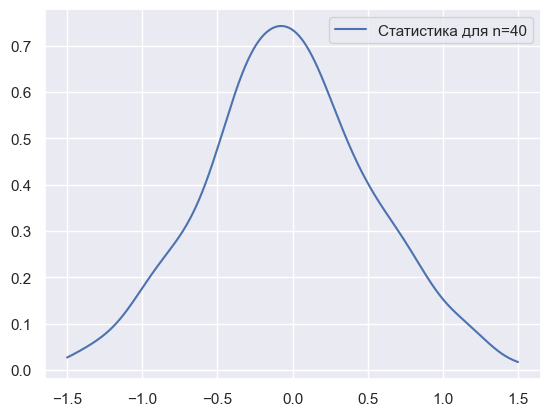

In [203]:
kde = sps.gaussian_kde(np.transpose(estim1)[n - 1])
plt.plot(x_values, kde(x_values), label = 'Статистика для n={}'.format(n))
plt.legend()
plt.show()

Видна сходимость плотности к нормальному распределению.

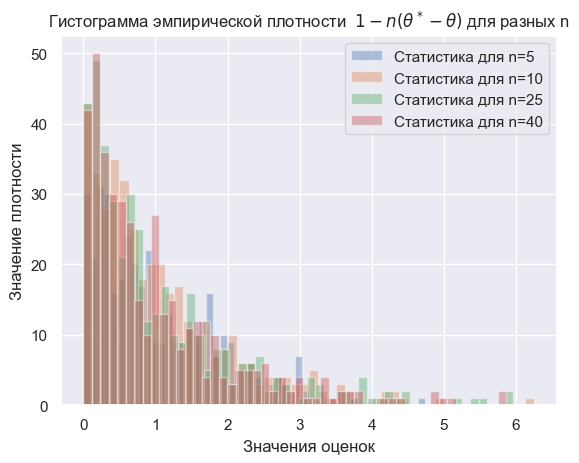

In [204]:
for n in n_values:
    plt.hist(np.transpose(estim2)[n - 1], alpha = 0.4, bins = 50, label = 'Статистика для n={}'.format(n))
plt.title(r"Гистограмма эмпирической плотности  $1 - n  (\theta^* - \theta)$ для разных n")
plt.xlabel("Значения оценок")
plt.ylabel("Значение плотности")
plt.legend()
plt.show()

Аналогично построим еще KDE

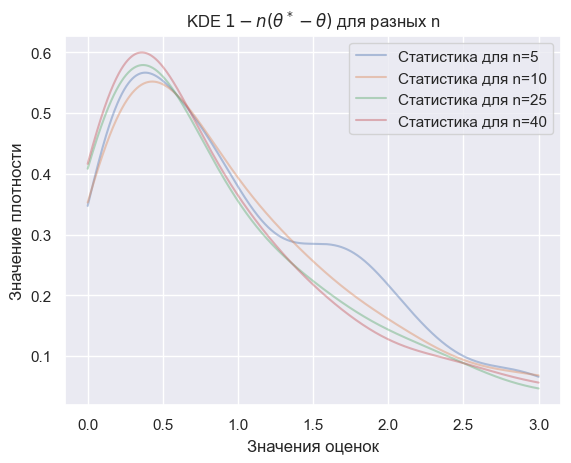

In [205]:
x_values = np.linspace(0, 3, 1000)
for n in n_values:
    kde = sps.gaussian_kde(np.transpose(estim2)[n - 1])
    plt.plot(x_values, kde(x_values), label = 'Статистика для n={}'.format(n), alpha = 0.4)
plt.title(r"KDE $1 - n  (\theta^* - \theta)$ для разных n")
plt.xlabel("Значения оценок")
plt.ylabel("Значение плотности")
plt.legend()
plt.show()

По гистограмме плотность похожа на экспоненциальную.

На какие распределения похожи получившиеся гистограммы?

**Ответ:** Плотность распределения первой статистики похожа на плотность нормального распределения. Про вторую же статистику сразу нельзя сказать какое она имеет распределение, но по гистограмме плотность похожа на плотность экспоненциального распределения.

Вспомните, чему равен коэффициент $\sigma^2(\theta)$ для асимптотически нормальной оценки $\hat\theta = 2\overline{X}$ параметра $\theta$ равномерного распределения в формуле
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}} \xrightarrow{d} \mathcal N(0, 1).
$$

**Ответ**: $\frac {\theta^2}{3}$

Посчитайте статистику
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}}
$$
 для каждой выборки. Постройте её плотность теоретически и при помощи KDE.

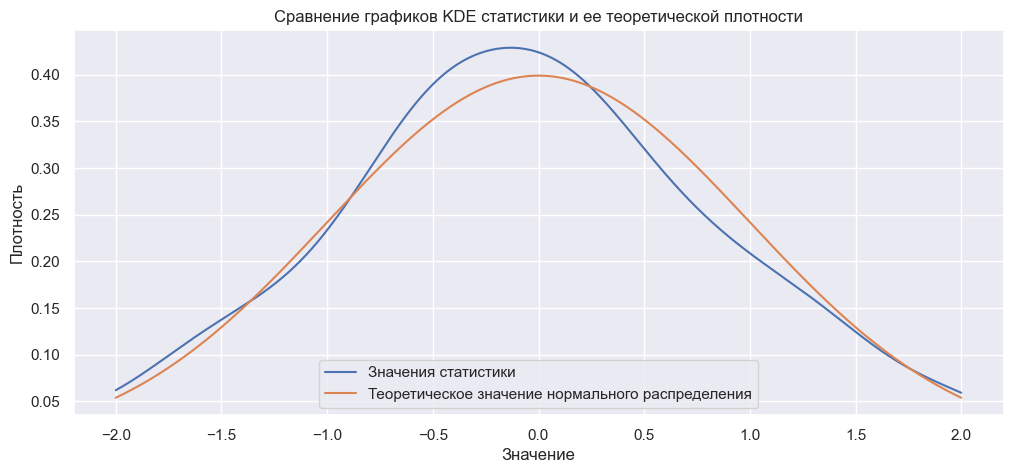

In [206]:
statistic = np.sqrt(n) * (theta_hat - theta)/np.sqrt(theta**2/3)
kde = sps.gaussian_kde(statistic)
x_values = np.linspace(-2,2, 1000)
plt.figure(figsize=(12,5))
plt.plot(x_values, kde(x_values), label = 'Значения статистики')
plt.plot(x_values, sps.norm.pdf(x_values), label = 'Теоретическое значение нормального распределения')
plt.title("Сравнение графиков KDE статистики и ее теоретической плотности")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.legend()
plt.show()

Графики не очень похожи. Скорее всего это связано с слишком малым размером выборки.

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению, часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Изучите семинарский ноутбук ноль и постройте QQ-plot предложенной статистики и нормального распределения.

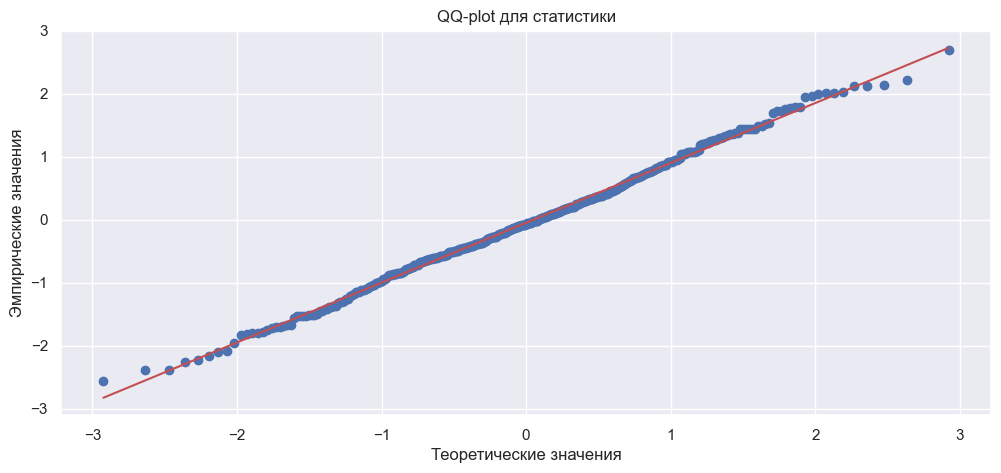

In [207]:
plt.figure(figsize=(12,5))
sps.probplot(statistic, dist="norm", fit=True, plot=plt)
plt.title("QQ-plot для статистики")
plt.xlabel("Теоретические значения")
plt.ylabel("Эмпирические значения")
plt.show()

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** По графику видно, что точки лежат на прямой, а значит можно сделать вывод, что действительно статистика имеет нормальное распределение.

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

Сначала проверим нормальное распределение

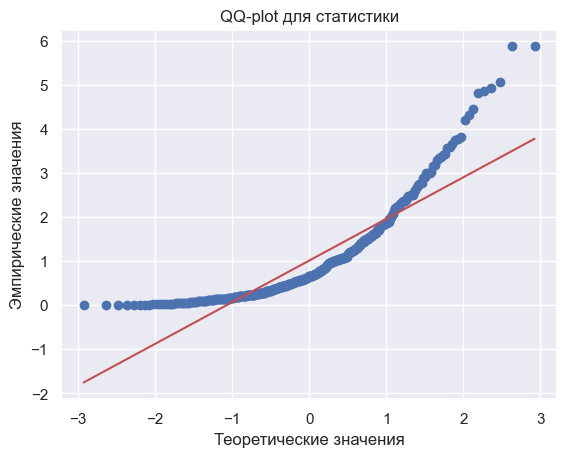

In [208]:
sps.probplot(np.transpose(estim2)[n-1], dist="norm", fit=True, plot=plt)
plt.title("QQ-plot для статистики")
plt.xlabel("Теоретические значения")
plt.ylabel("Эмпирические значения")
plt.show()

На графике точке не лежат на прямой а как-то огибают ее. Значит скорее всего статистика имеет не нормальное распределение.

Проверим теперь экспоненциальное распредление.

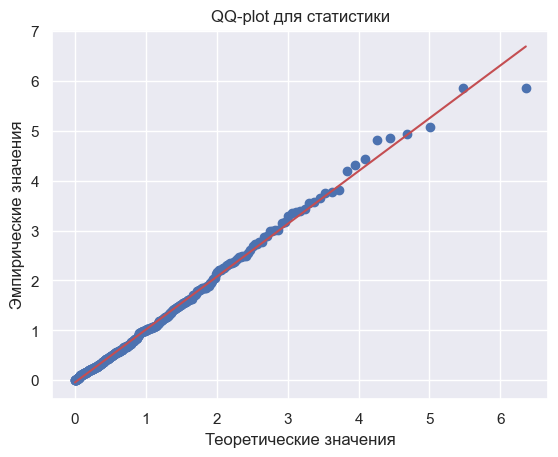

In [209]:
sps.probplot(np.transpose(estim2)[n-1], dist="expon", fit=True, plot=plt)
plt.title("QQ-plot для статистики")
plt.xlabel("Теоретические значения")
plt.ylabel("Эмпирические значения")
plt.show()

Действительно видно, что точки лежат на прямой, но в конце они чуть-чуть сьезжают сначала вверх потом вниз. Поэтому скорее всего статистика имеет экспоненциальное распределение.

**Ответ:** исходя из QQ-плота мы получили, что первая статистика имеет нормальное распределение, а вторая экспоненциальная. Это подтверждает, полученные нами теоретические результаты для первой статистики.

Бонусная часть (+5 баллов): Если Вы нашли семейство распределений, которое по QQ-plot соответствует выборке, то докажите строго, что $n(\theta^* - \theta)$ сходится к нему. Заметьте, что это утверждение от асимптотической нормальности отличается только заменой $\sqrt{n}$ на $n$. Такие оценки называются **сверхнормальными**. В конце доказательства поясните:

- как множитель, зависящий от $n$, связан с скоростью сходимости оценки на практике?
- лучше ли сверхномальная оценка, чем нормальная оценка?

**Решение:**

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**

Не забудьте перезапустить с нуля весь ноутбук перед отправкой! Удачи.